# Distributions

A quick survey of the common statistical distributions.

By David Liang, davidliang000@gmail.com (2026)

# 0. Introduction


## 0.0. Preface

This began initially as a quick exercise in simulating the common statistical distributions and noting their basic properties.  However, this quickly ballooned into a more detailed treatment of the proofs and intuition behind the distributions.  I hope you enjoy working through these as much as I did

## 0.1. About


We will be doing a quick treatment of the following common distributions:
1. Normal / Gaussian
2. Bernoulli
3. Binomial
4. Multinomial
5. Uniform
6. Beta
7. Poisson
8. Exponential
9. Erlang
10. Chi-Squared
11. Gamma
    - a generalization of the Exponential, Chi-square and Erlang distributions
12. Student's-t

We will be noting the distributions' parameters, statistics (mean, variance), proofs of statistics, as well as relevant properties such as relationships to other distributions.  We will also sample from the distribution, and plot the empirical sample and CDF against the theoretical PDF/PMF and CDF.

## 0.2. Code

### 0.2.1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import norm, bernoulli, binom, uniform, beta, poisson, expon, erlang, chi2, gamma, t
from numpy.random import normal, binomial, uniform, beta, poisson, exponential, chisquare, gamma, standard_t
# NOTE ^ need to re-import these before use, due to overlapping names.  I am just listing them here as a reference

from math import factorial, comb, exp, pi
from scipy.special import beta as Beta  # don't confuse with scipy.stats.beta or numpy.random.beta above
from scipy.special import gamma as Gamma

from utils import simulate_distribution, simulate_distribution_numpy

### 0.2.2. Examples of Code

Examples of the `simulate_distribution` and `simulate_distribution_numpy` functions imported from `sample_distributions`.

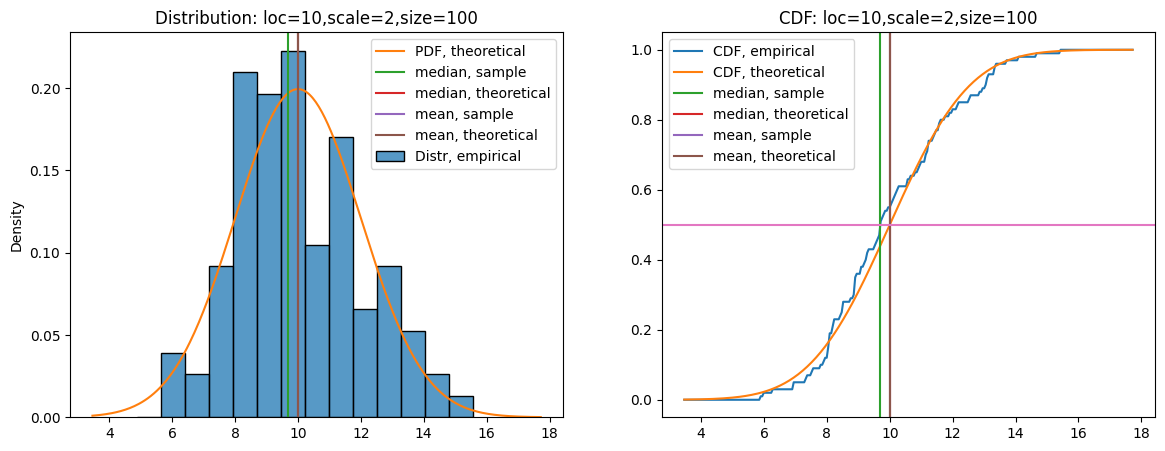

10.008305941916621 9.997501211759689


<Figure size 640x480 with 0 Axes>

In [3]:
# Normal distribution with mean 10 and standard deviation 2

results = simulate_distribution(sample_size=100, scipy_object = norm, loc=10, scale=2)

print(results[0].mean(), (results[1]*results[2]).sum() * (results[1][1] - results[1][0]))  # should be about equal to 10


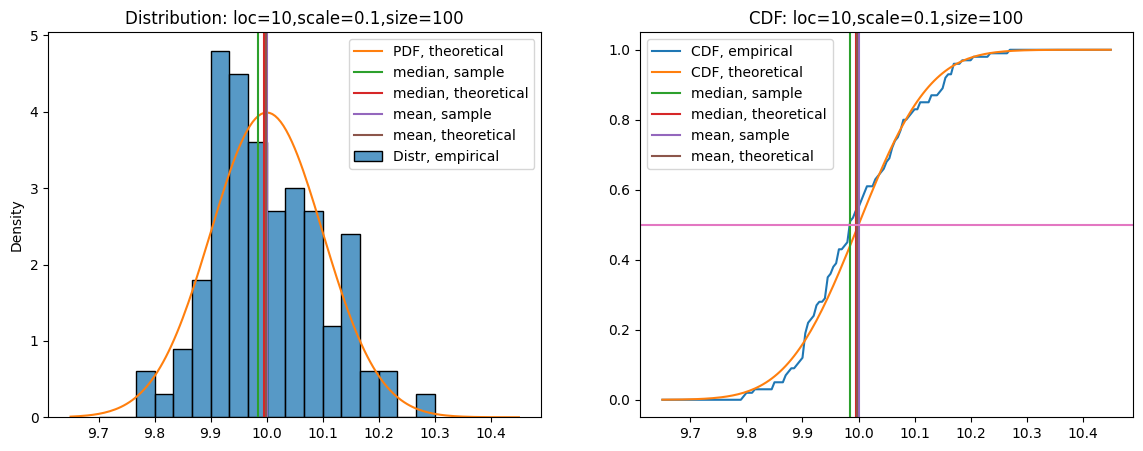

<Figure size 640x480 with 0 Axes>

In [5]:
# Normal distribution with mean=10, SD = 1/10.  Manually setting the support and bins

results = simulate_distribution(sample_size=100, scipy_object = norm, loc=10, scale=1/10,
                               support = np.arange(9.65, 10.455, 0.005), bins = np.arange(9.7, 10.31, 0.1/3))


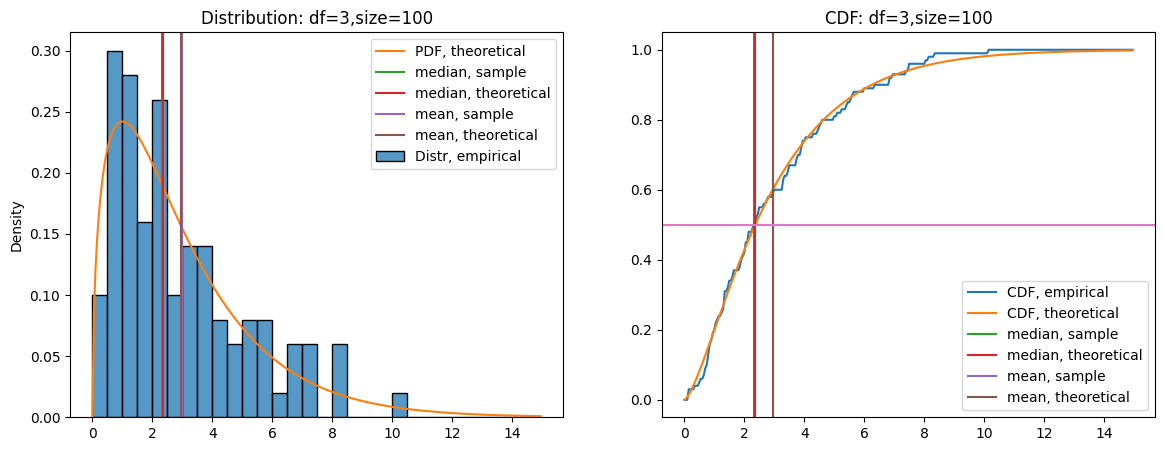

2.9706586348293804 2.968585723942756


<Figure size 640x480 with 0 Axes>

In [50]:
# Chi2 distribution with degrees of freedom = 3

results = simulate_distribution(
    sample_size=100, 
    scipy_object = chi2, 
    df=3,
    support = np.arange(0,15,0.05),
    bins = np.arange(0,15,0.5),
)

print(results[0].mean(), (results[1]*results[2]).sum() * (results[1][1] - results[1][0]))  # should be about equal to 3


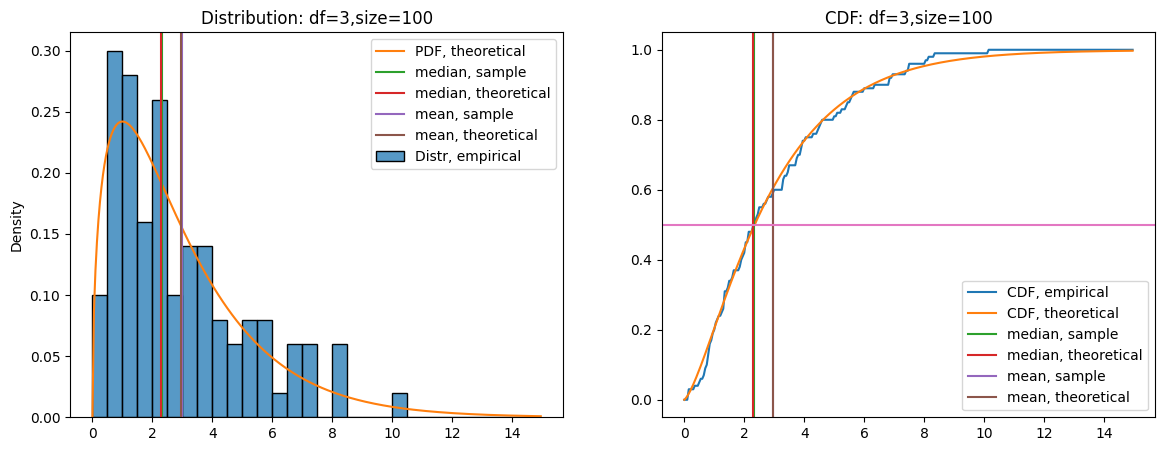

2.9706586348293804 2.9685857239427555


<Figure size 640x480 with 0 Axes>

In [3]:
# Chi2 distribution with degrees of freedom = 3, numpy version

df=3
chi2_pdf = lambda x: x**(df/2 - 1) * exp(-x/2) / (2**(df/2) * Gamma(df/2))

results = simulate_distribution_numpy(
    sample_size=100, 
    np_rng = np.random.chisquare,
    df=3, 
    pdf_lambda = chi2_pdf,
    support = np.arange(0,15,0.05),
    bins = np.arange(0,15,0.5),
)

print(results[0].mean(), (results[1]*results[2]).sum() * (results[1][1] - results[1][0]))  # should be about equal to 3


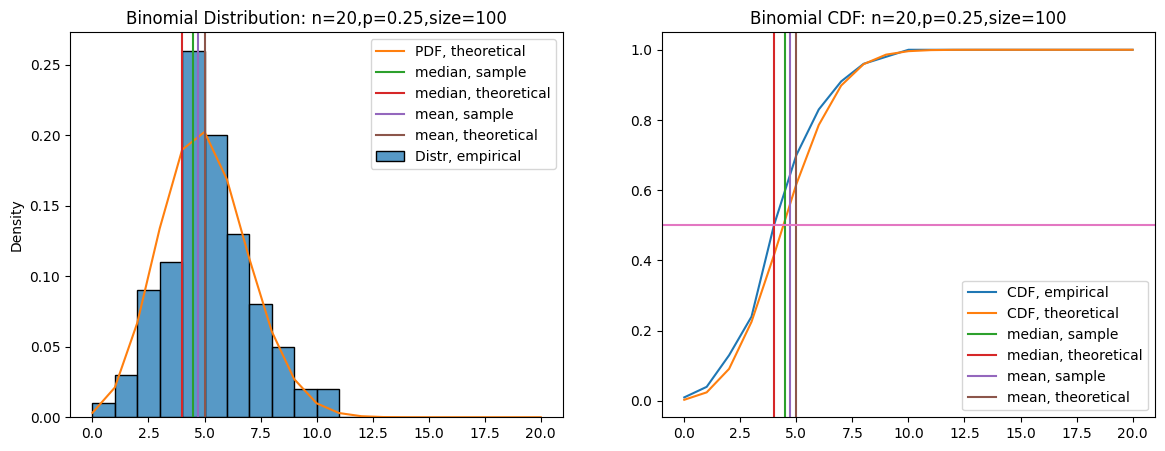

4.7 5.000000000000001


<Figure size 640x480 with 0 Axes>

In [34]:
# Binomial Distribution with n=20,p=0.25

results = simulate_distribution(sample_size=100, scipy_object = binom, n=20, p=0.25, name = 'Binomial',
                               support = np.arange(21), bins = np.arange(21))

print(results[0].mean(), (results[1]*results[2]).sum() * (results[1][1] - results[1][0]))  # should be about equal to 5


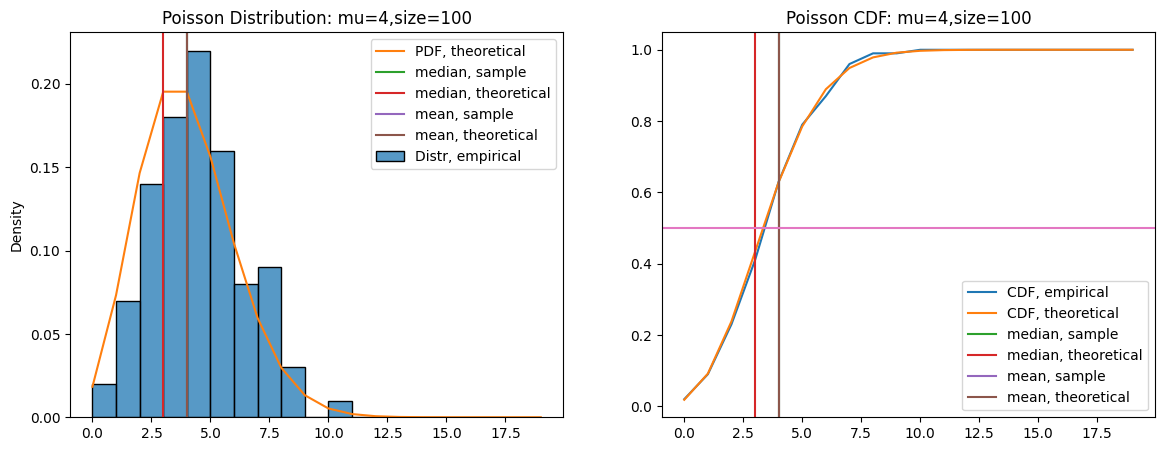

4.02 3.999999793648637


<Figure size 640x480 with 0 Axes>

In [5]:
# Poisson distribution with lambda=4

results = simulate_distribution(
    sample_size = 100, 
    scipy_object = poisson, 
    mu = 4,
    name = 'Poisson',
    support = np.arange(20),
    bins = np.arange(20),
)
print(results[0].mean(), (results[1]*results[2]).sum() * (results[1][1] - results[1][0]))  # should be about equal to 4


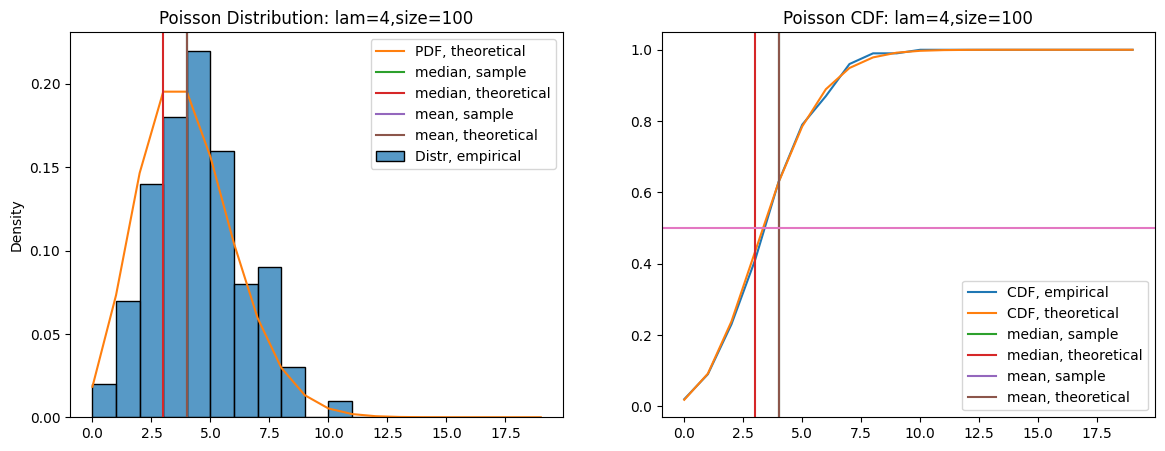

4.02 3.9999997936486387


<Figure size 640x480 with 0 Axes>

In [7]:
# Poisson distribution with lambda=4,  numpy version

lam = 4
poisson_pdf = lambda x: lam**x * exp(-lam) / factorial(x)

results = simulate_distribution_numpy(
    sample_size = 100,
    np_rng = np.random.poisson,
    lam = lam,
    pdf_lambda = poisson_pdf, 
    name = 'Poisson',
    support = np.arange(20),
    bins = np.arange(20),
)

print(results[0].mean(), (results[1]*results[2]).sum() * (results[1][1] - results[1][0]))  # should be about equal to 4


---
# 1. Normal Gaussian

$$ X \sim \mathcal N(\mu, \sigma^2)$$

A common distribution to capture natural variance of measurements.  

$$ \mathcal N(\mu, \sigma^2) \, \equiv \, \sigma (\mathcal N(0,1) + \mu) $$

## 1.1. Parameters:
- $\mu$: mean
- $\sigma$: standard deviation (variance $\sigma^2$)
- `scipy.stats` and `numpy.random` equivalents: `loc`,`scale`

## 1.2. PDF:
$$ 
\begin{equation}
f(x) = \frac 1{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{equation}$$

## 1.3. Statistics:
Mean $\mu$ and variance $\sigma^2$ are specified in the parameterization of the distribution.

## 1.4. Proofs

### 1.4.1. PDF Integrates to 1

#### 1.4.1.1. Lemma 1: Switching from $(x,y)$ to $(r,\theta)$ polar coordinates: $dx\, dy = r\, dr\, d\theta$
We note that $dx\,dy$ is a *wedge product* $\wedge$, representing the area between two vectors.  It has the following properties:
- $v \wedge v = 0$
- $v \wedge w = - w \wedge v$

Also, we note the conversion from Cartesian $(x,y)$ to polar $(r,\theta)$:
- $x = r \cos \theta, \,\, y = r\sin\theta$
- $dx = -r \sin\theta \,d\theta + \cos\theta \,dr, \,\, dy = r\cos\theta\,d\theta + \sin\theta\,dr$

$$
\begin{aligned}
dx \wedge dy &= (-r \sin\theta \,d\theta + \cos\theta \,dr) \wedge (r\cos\theta\,d\theta + \sin\theta\,dr) \\
&= -r^2 \sin\theta\cos\theta \,d\theta \wedge d\theta - r\sin^2\theta \,d\theta \wedge dr + r\cos^2\theta \,dr \wedge d\theta + \cos\theta\sin\theta \,dr\wedge dr \\
&= 0 + r\sin^2\theta dr\wedge d\theta + r\cos^2 dr \wedge d\theta \\
&= r dr \wedge d\theta = r\, dr \, d\theta
\end{aligned}
$$

#### 1.4.1.2. Lemma 2: $\int_{-\infty}^\infty \exp(-x^2)\,dx = \sqrt\pi$

Let $I := \int_{-\infty}^\infty \exp(-x^2)\,dx$.  Then
$$
\begin{aligned}
I^2 &= \left( \int_{-\infty}^\infty \exp(-x^2)\,dx \right) \left( \int_{-\infty}^\infty \exp(-y^2)\,dy \right) \\
  &= \int_{-\infty}^\infty \int_{-\infty}^\infty \exp(-(x^2+y^2)) \, dx\,dy \\
  &= \int_0^{2\pi} \left( \int_0^\infty \exp(-r^2) \, r \, dr \right)\,d\theta & \text{switch to polar coordinates} \\
  &= 2\pi \int_0^\infty \exp(-u) \cdot \frac12 \, du & (u = r^2) \\
  &= 2\pi \left[-\frac12\exp(-u)\right]_0^\infty = \pi
\end{aligned}
$$

#### 1.4.1.3. Integrating Normal PDF
$$ 
\begin{aligned}
\int_{-\infty}^\infty f(x,\mu,\sigma) &= \int \frac1{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right)\,dx \\
&= \int_{-\infty}^\infty \frac1{\sqrt\pi} \exp(-u^2) \, du & \left( u = \frac{x-\mu}{\sqrt{2\sigma^2}} \right)\\
&= 1
\end{aligned}
$$

### 1.4.2. Mean = $\mu$ 

$$ 
\begin{aligned}
\mathrm E[X] &= \int_{-\infty}^\infty x f(x,\mu,\sigma)\,dx \\
  &= \int_{-\infty}^\infty x \frac 1{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right) \,dx \\
  &= \int_{-\infty}^\infty (x-\mu)\frac 1{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right) \,dx + 
    \int_{-\infty}^\infty \mu \frac 1{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right) \,dx \\
  &= \int_{-\infty}^0 u \frac 1{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{u^2}{2\sigma^2} \right) \,du + 
    \int_{0}^\infty u \frac 1{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{u^2}{2\sigma^2} \right) \,du + 
    \mu \int_{-\infty}^\infty f(x, \mu, \sigma) \,dx & u = x-\mu \\
  &= 0 + \mu & \text{ (first two terms cancel out)} \\
  &= \mu
\end{aligned}
$$

### 1.4.3. Variance = $\sigma^2$

#### 1.4.3.1. Computing the 2nd Moment $\mathrm E[X^2]$
$$ 
\begin{aligned}
\mathrm E[X]^2 &= \int_{-\infty}^\infty x^2 \frac1{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right) \, dx \\
  &= \sigma^2 \int \left( \left(\frac{x-\mu}{\sigma}\right)^2 + \frac{2\mu}{\sigma^2}x - \frac{\mu^2}{\sigma^2} \right) \cdot \frac1{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right) \, dx \\
  &= \sigma^2 \left( \int y^2 \frac1{\sqrt{2\pi}} \exp\left(-y^2/2\right) \, dy \,+\, 
  \frac{2\mu}{\sigma^2} \int x \, f(x,\mu,\sigma) \, dx 
  \,+ \, \frac{\mu^2}{\sigma^2} \int f(x,\mu,\sigma) \, dx \right) & \left(\text{expanding sum, and } y=\frac{x-\mu}{\sigma} \right) \\
  &= \sigma^2 \left( \int y \frac1{\sqrt{2\pi}} \exp(-y^2/2) \cdot y \, dy + \frac{2\mu}{\sigma^2} \cdot \mu - \frac{\mu^2}{\sigma^2} \right) & \text{last two integrals are expected value and of PDF} \\
  &= \sigma^2 \left( \left[-y \cdot \frac1{\sqrt{2\pi}} \exp(-y^2/2) \right]_{-\infty}^\infty - \int -\frac1{\sqrt{2\pi}} \exp(-y^2/2) \, dy \,+\, \frac{\mu^2}{\sigma^2}\right) & \text{integrate by parts: } u=y, dv = \exp(-y^2/2)y\,dy \\
  &= \sigma^2 \left( [0 - 0] + 1 + \frac{\mu^2}{\sigma^2} \right)  &  \text{L'Hopital, and integrating the PDF} \\
  &= \sigma^2 + \mu^2
\end{aligned} 
$$

#### 1.4.3.2. Incorporating into Variance
$$\mathrm{Var}[X] = \mathrm E[X^2] - \mathrm E[X]^2 = (\sigma^2 + \mu^2) - \mu^2 = \sigma^2 $$

## 1.5. Simulation

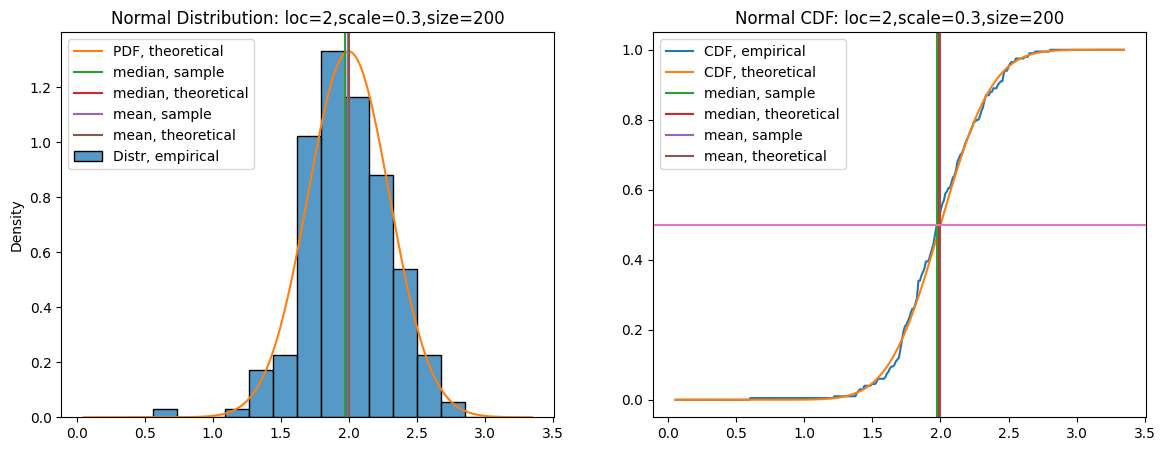

<Figure size 640x480 with 0 Axes>

In [10]:
from scipy.stats import norm

mu = 2
sigma = 0.3

results = simulate_distribution(
    sample_size=200, 
    scipy_object = norm, 
    loc=mu, 
    scale=sigma,
    name='Normal')

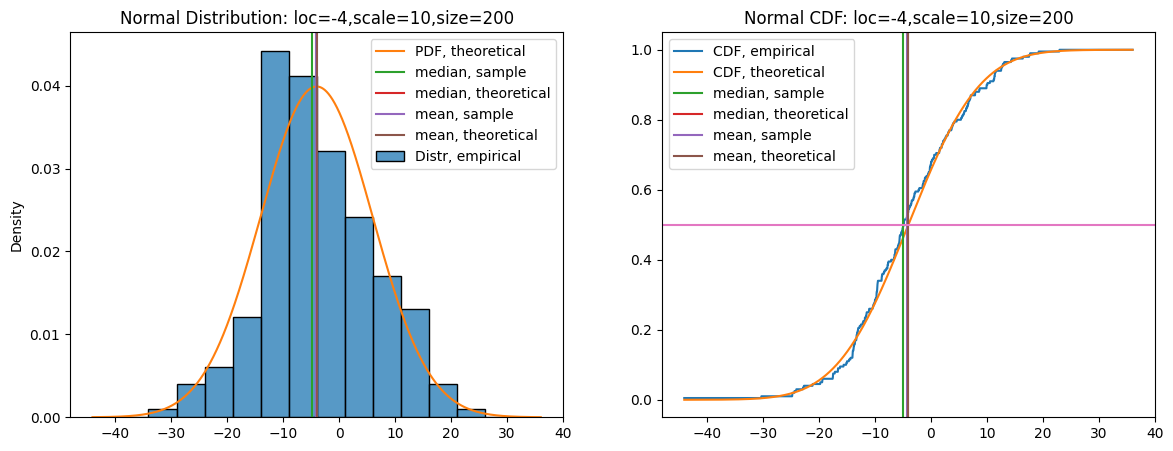

<Figure size 640x480 with 0 Axes>

In [269]:
from numpy.random import normal

mu = -4
sigma = 10

normal_pdf = lambda x: exp(-(x-mu)**2 / (2 * sigma**2)) / (2 * pi * sigma**2)**0.5

results = simulate_distribution_numpy(
    sample_size=200, 
    np_rng = normal, 
    loc=mu, 
    scale=sigma,
    pdf_lambda = normal_pdf,
    support = np.arange(-44, 36.01, 0.04),
    bins = np.arange(-44, 36, 5),
    name='Normal')

---
# 2. Bernoulli
A discrete random variable taking on values 0 or 1.



## 2.1. Parameters:
- $p$ (`p`): Probability the variable equals 1

## 2.2. PMF
$$ 
\begin{equation}\begin{aligned}
P(x=1) &:= p \\
P(x=0) &= 1-p := q
\end{aligned}\end{equation}
$$

## 2.3. Statistics
$$ \begin{equation}\begin{aligned}
\mathrm E[X] &= p \\
\mathrm{Var}[X] &= p - p^2 = pq
\end{aligned}\end{equation}$$

## 2.4. Proof
Should follow trivially from definition of variable.

## 2.5. Simulation

(We note that this distribution isn't particularly conducive to nice pretty plots, given how we've defined our plotting functions.)

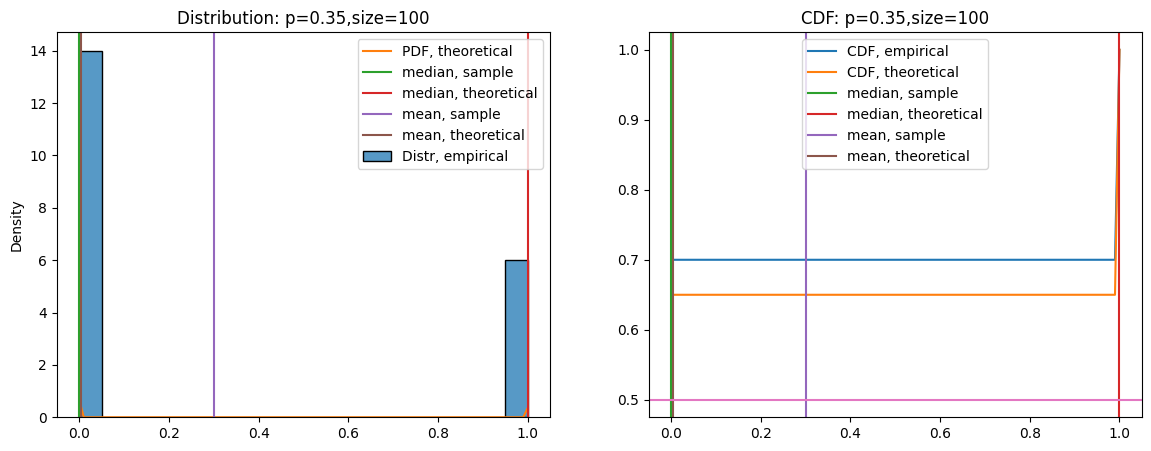

<Figure size 640x480 with 0 Axes>

In [66]:
from scipy.stats import bernoulli

results = simulate_distribution(sample_size=100, scipy_object = bernoulli, p=0.35,
                               support = np.arange(0, 1.01, 0.01),
                               bins = np.arange(0, 1.01, 0.05))

---
# 3. Binomial

$$ X \sim \text{Bin}(n,p) \, \text{ for } \, n \in \mathbb N, \, p \in [0,1]$$

The sum of $n$ independent, identically distributed (i.i.d.) Bernoulli random variables with probability $p$.

$$ \text{Bin}(n,p) \, \equiv \, \sum_{i=1}^n X_i \, \text{ for } \, X_i \, \text{ i.i.d. Bernoulli with probability } p$$

## 3.1. Parameters: 
- $n$ (`n`): number of independent trials
- $p$ (`p`): probability of each trial being a success
- $q = 1-p$

## 3.2. PMF:
$$ \begin{equation} 
P(X=k) = \binom n k p^k q^{n-k}
\end{equation}$$

## 3.3. Statistics
$$ \begin{equation}\begin{aligned}
\mathrm E[X] &= np \\
\mathrm{Var}[X] &= npq
\end{aligned}\end{equation}$$

## 3.4. Proofs
We note that the Binomial distribution is the sum of $n$ independent Bernoulli random variables.  We note that expectation $\mathrm E$ is linear, and Variance $\mathrm{Var}$ is linear for independent variables.

## 3.5. Simulation

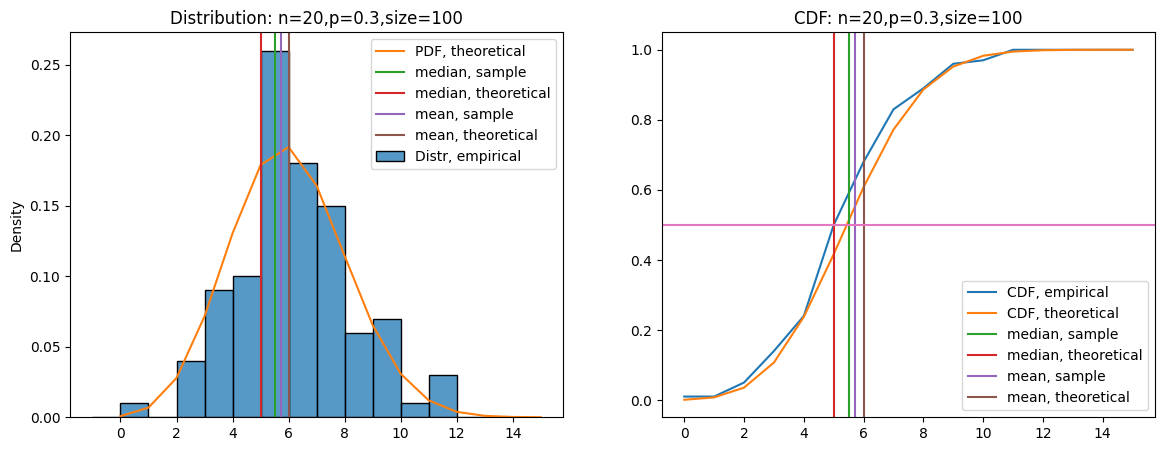

<Figure size 640x480 with 0 Axes>

In [77]:
from scipy.stats import binom

results = simulate_distribution(sample_size=100, scipy_object = binom, n=20, p=0.3)

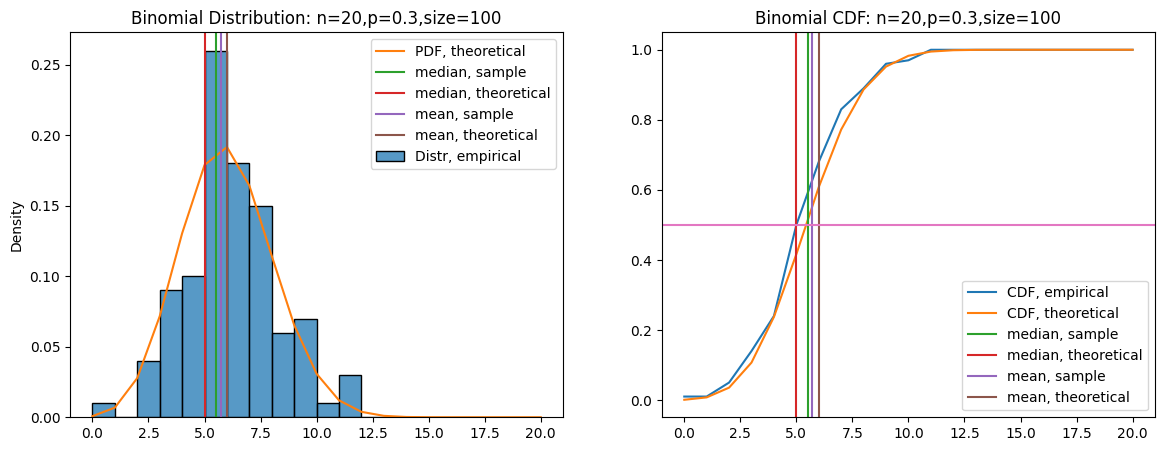

<Figure size 640x480 with 0 Axes>

In [271]:
from numpy.random import binomial

n = 20
p = 0.3

pmf_binom = lambda x: comb(n, x) * p**x * (1-p)**(n-x)

results = simulate_distribution_numpy(
    sample_size=100, 
    np_rng = binomial,
    n=20,
    p=0.3,
    pdf_lambda = pmf_binom,
    name='Binomial',
    support = np.arange(n+1),
    bins = np.arange(n+1))


---
# 4. Multinomial
A multiple-case generalization of the Binomial Distribution



## 4.1. Parameters:
- $n$ number of trials
- $p_i$ event probabilities for $i=1,...k$ with $p_1 + \cdots + p_k = 1$

## 4.2. PMF
$$ \begin{equation}
P(x_1, ... x_k) = \frac{n!}{x_1! \cdots x_k!} p_1^{x_1} \cdots p_k^{x_k}  = n! \prod_{i=1}^k \frac{p_i^{x_i}}{x_i!}
\end{equation}$$

## 4.3. Simulation

We note that when plotting the individual random variables on their own, they behave like a normal Binomial random variable.

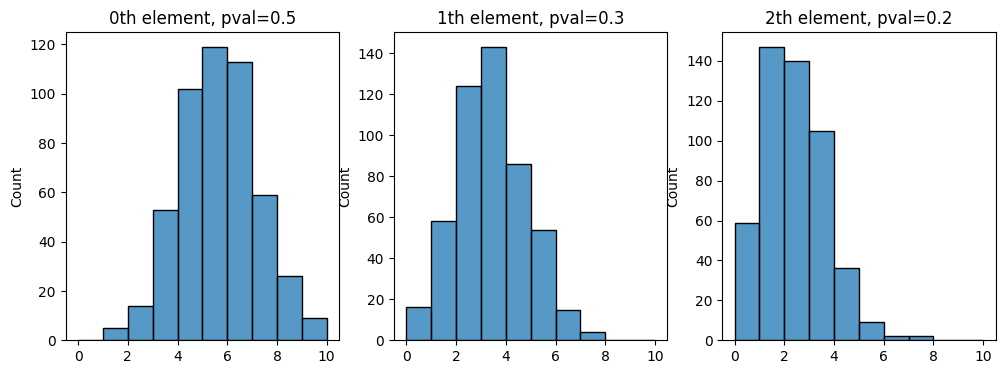

In [69]:
np.random.seed(5)

n=10
pvals = [0.5, 0.3, 0.2]
rng = np.random.default_rng()
x = rng.multinomial(n=n, pvals=pvals, size=500)
x

bins = range(n+1)

#sns.histplot(x[:,0], alpha=0.4, bins=bins)
#sns.histplot(x[:,1], alpha=0.4, bins=bins)
#sns.histplot(x[:,2], alpha=0.4, bins=bins)
#plt.show()

fig, ax = plt.subplots(1,len(pvals), figsize = (4*len(pvals),4))
for i,p in enumerate(pvals):
    sns.histplot(x[:,i], bins=bins, ax=ax[i])
    ax[i].set_title(f'{i}th element, pval={p}')
    
plt.show()

---
# 5. Uniform
A continuous random variable taking a value between $a$ and $b$, with uniform likelihood across the range.
$$ X \sim \mathcal U(a,b)$$



## 5.1. Parameters:
- $a,b$ lower and upper bounds
- `scipy.stats` version: `loc`,`scale` = lower bound, range
- `numpy.random` version: `low`,`high` = lower bound, upper bound

## 5.2. PDF and CDF
$$ \begin{equation} f(x,a,b) = \frac 1{b-a} \end{equation}$$
for $X\in(a,b)$, else 0.

$$ \begin{equation} F(x,a,b) = \frac{x-a}{b-a} \end{equation}$$
for $x \in (a,b)$, else 0 if $x<a$ or 1 if $x>b$.

## 5.3. Statistics
$$ \begin{equation}\begin{aligned}
\mathrm E[X] &= \frac{a+b}2 \\
\mathrm{Var}[X] &= \frac{(b-a)^2}{12}
\end{aligned}\end{equation}$$

## 5.4. Proofs

### 5.4.1. Mean

$$\begin{aligned}
\mathrm E[X] &= \int_a^b x \frac1{b-a}\,dx \\
  &= \frac1{b-a} \left[ \frac12 x^2 \right]_a^b \\
  &= \frac1{b-a} \cdot \frac{b^2-a^2}{2} \\
  &= \frac{a+b}2
\end{aligned}
$$

### 5.4.2. Variance
$$\begin{aligned}
\mathrm E[X^2] &= \int_a^b x^2 \frac1{b-a}\,dx \\
  &= \frac1{b-a} \left[ \frac{x^3}3\right]_a^b \\
  & = \frac13 \cdot \frac{b^3-a^3}{b-a} = \frac{b^2+ab+a^2}{3} \\
\mathrm{Var}[X^2] &= E[X^2] - E[X]^2 \\
  &= \frac{b^2+ab+a^2}{3} - \frac{(b+a)^2}4 \\
  &= \frac{b^2-2ab+a^2}{12} = \frac{(b-a)^2}{12}
\end{aligned}
$$

## 5.5. Simulation

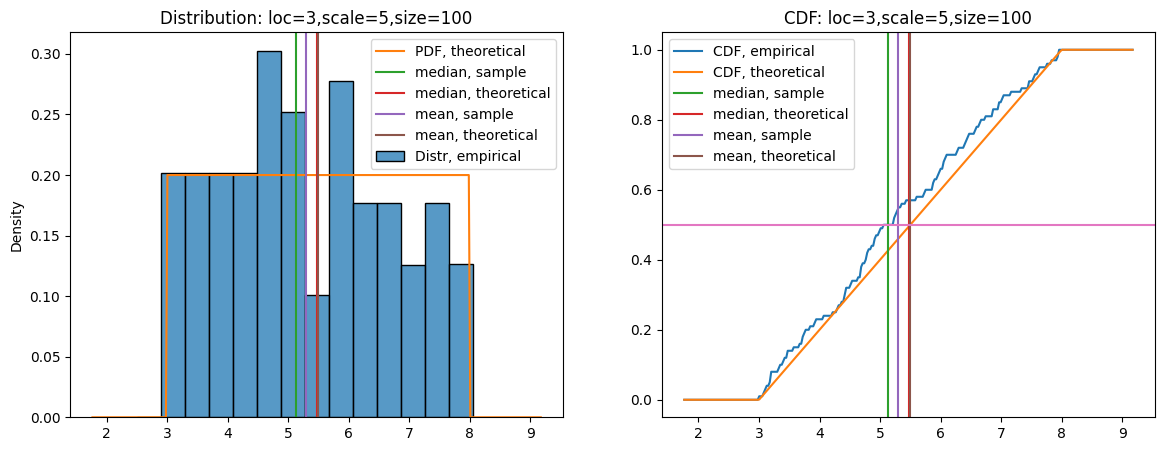

<Figure size 640x480 with 0 Axes>

In [275]:
from scipy.stats import uniform

results = simulate_distribution(
    sample_size=100, 
    scipy_object = uniform, 
    loc=3, 
    scale=5)

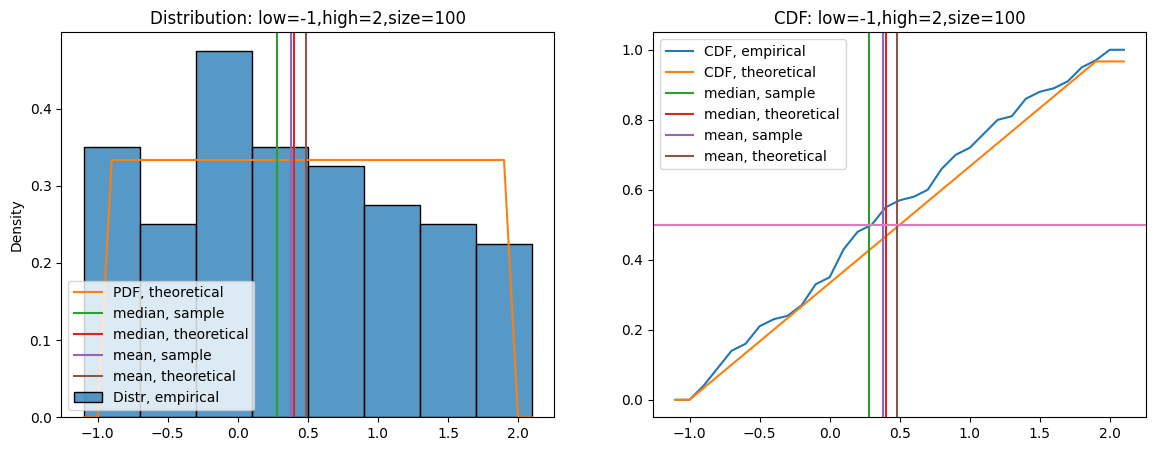

<Figure size 640x480 with 0 Axes>

In [277]:
from numpy.random import uniform

a,b = -1, 2

pdf_unif = lambda x: 1/(b-a) if x>a and x<b else 0

results = simulate_distribution_numpy(
    sample_size=100, 
    np_rng = uniform, 
    low=a, 
    high=b,
    pdf_lambda = pdf_unif,
    support = np.arange(a-0.1, b+0.11, 0.1),
    bins = np.arange(a-0.1, b+0.11, 0.4),
)

---
# 6. Beta

$$ X \sim \text{Beta}(\alpha,\beta) \, \text{ for } \, \alpha,\beta > 0$$

The Beta distribution is a continuous distribution between 0 and 1.  It is a generalization of the Uniform distribution.

$$ \mathcal U(0,1) \, \equiv \, \text{Beta}(1,1) $$

## 6.1. Parameters
- $\alpha$ (`a`)
- $\beta$ (`b`)
- `loc`,`scale` to shift the distribution into range `[loc, loc+scale]`

## 6.2. PDF
$$ 
\begin{equation}
\begin{aligned}
f(x, \alpha, \beta) &= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \\
&= \frac 1{\text B(\alpha, \beta)}  x^{\alpha-1} (1-x)^{\beta-1} \\
&\propto x^{\alpha-1} (1-x)^{\beta-1}
\end{aligned}
\end{equation}
$$

Main takeaway: 
$$ f(x, \alpha, \beta) \space \propto \space x^{\alpha-1}(1-x)^{\beta-1} $$

## 6.3. Statistics
$$ \begin{equation}
\begin{aligned}
\mathrm E[X] &= \frac{\alpha}{\alpha+\beta} \\
\mathrm{Var}[X] &=  \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
\end{aligned}
\end{equation}$$

## 6.4. Proofs, and Other Notes

Derivation of Mean and Variance, plus extra details about the Beta $( \text{B})$ and Gamma $(\Gamma)$ functions


### 6.4.1. Beta Function


The normalizing constant so the PDF integrates to 1
$$\begin{equation}
\text B(\alpha, \beta) := \int_0^1 x^{\alpha-1}(1-x)^{\beta-1}\,dx = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
\end{equation}$$

If $\alpha,\beta \in \mathbb N$ are positive integers, then 
$$\begin{equation}
\text B(\alpha, \beta) = \frac{\alpha+\beta} {\alpha\beta\cdot \binom{\alpha+\beta}{\alpha}} 
\end{equation}$$



### 6.4.2. Gamma Function



The Gamma function is extension of the factorial function to complex numbers

$$ \begin{equation} \Gamma(x) = \int_0^\infty t^{x-1} e^{-t} \,dt \end{equation}$$
for $x$ where $\Re(x)$ the real part $x$ is strictly positive.

#### Properties of Gamma Function:
1. Base case: $\,\Gamma(1)=1$
$$ \begin{equation}
\Gamma(1) = \int_0^\infty t^{1-1} e^{-t}\,dt = \int_0^\infty e^{-t}\,dt = \left[-e^{-t}\right]_0^\infty = 0-(-1) = 1
\end{equation}$$
2. Inductive step: $\, \Gamma(x+1) = x \Gamma(x)$
$$ 
\begin{equation}
\begin{aligned}
\Gamma(x+1) &= \int_0^\infty t^x e^{-t} \,dt \\
&= \left[ -t^xe^{-t} \right]_0^\infty + \int_0^\infty x t^{x-1} e^{-t} \,dt & \text{integration by parts} \\
&= [0 - 0] + x \int_0^\infty t^{x-1} e^{-t} \,dt  &  (*)\text{ see \#5 below} \\
&= x \Gamma(x)
\end{aligned}
\end{equation}
$$
3. Inductive conclusion:  for $n \in \mathbb{N}$
$$ \Gamma(n) = (n-1)! $$
4. $\Gamma(1/2) = \sqrt{\pi}$
$$ 
\begin{equation}
\begin{aligned}
\Gamma(1/2) &= \int_0^\infty t^{-1/2} \, e^{-t} \, dt \\
    &= \int_0^\infty \frac{1}{u} \, e^{-u^2} \cdot 2u \, du 
        & (t = u^2, \, dt = 2u\,du ) \\
   &= 2 \cdot \int_0^\infty e^{-u^2} \, du \\
   &= \int_{-\infty}^\infty e^{-u^2} \, du 
       & \text{symmetric over } u=0 \\
   &= \sqrt \pi 
       & \text{lemma in 1.4.1.2.}
\end{aligned}
\end{equation}
$$

5.  Note: $(*)$ in the inductive step requires $\Re(x)>0$:
$$
\begin{aligned}
\lim_{t\to\infty} -t^xe^{-t} &=  \lim_{t\to\infty} \frac{-t^x}{e^t} \\
  &=\lim_{t\to\infty} \frac{-xt^{x-1}}{e^t} \\
  &... \\
  &= \lim_{t\to\infty} \frac{y t^z}{e^t} & \text{ for } y \text{ bound and } \Re(z)<0 \\
  &= 0 \\
\lim_{t\to 0} -t^xe^{-t} &=   \lim_{t\to 0} \frac{-t^x}{e^t} \\
  &= \frac01 = 0 & \text{  if  } \Re(x) > 0 \text{; else, goes to } \infty \text{ (see \#6 below) }
\end{aligned}
$$
6. For complex exponents, if $x = a + bi$, then $t^x$ has magnitude $e^{a \ln t}$, which depends on $a = \Re(x)$
$$t^x = e^{\ln t(a+bi)} =  e^{a\ln t} e^{ib\ln t} = e^{a\ln t} (\sin(b\ln t) + i\cos(b\ln t))$$
$$ a>0 \rightarrow \lim_{t\to 0} e^{a\ln t} = \lim_{t\to0} t^a = 0$$


### 6.4.3. Proof: PDF integrates to 1



We want to show that
$$ \int_0^1 x^{\alpha-1}(1-x)^{\beta-1}\,dx = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$ 
Equivalently, we will show that 
$$ {\Gamma(\alpha)\Gamma(\beta)} =  {\Gamma(\alpha+\beta)} \int_0^1 x^{\alpha-1}(1-x)^{\beta-1}\,dx$$

$$ \begin{aligned}
\mathrm{LHS} &= \Gamma(\alpha)\Gamma(\beta) \\
  &= \int_0^\infty u^{\alpha-1}e^{-u} \, du \int_0^\infty v^{\beta-1}e^{-v} \, dv \\
  &= \int_0^\infty \int_0^\infty  u^{\alpha-1} v^{\beta-1} e^{-(u+v)} \, du \, dv \\
  &= \int_{s=0}^\infty \int_{t=0}^1 (st)^{\alpha-1} (s(1-t))^{\beta-1} e^{-s} \, s \, dt \, ds 
    & (u = st, v = s(1-t) \text{;  see note below}) \\
  &= \int_{s=0}^\infty s^{\alpha+\beta-2} e^{-s1} \, s \, ds \cdot \int_{t=0}^1 t^{\alpha-1} (1-t)^{\beta-1} dt \\
  &= \int_{s=0}^\infty s^{\alpha+\beta-1} e^{-s1} \, ds \cdot \int_{t=0}^1 t^{\alpha-1} (1-t)^{\beta-1} \\
  &= \Gamma(\alpha+\beta) \int_0^1 x^{\alpha-1}(1-x)^{\beta-1} \, dx \, = \, \mathrm{RHS}
\end{aligned}$$

#### Note on variable substitution

We have used the substitution $u = st,\, v = s(1-t)$ in the proof. 

This is motivated by parameterizing $u,v$ by their sum $s = u+v$, and the relative weights of $u,v$, $t = \frac{u}{u+v}$

Taking the differentials, and noting the properties of the wedge product $\wedge$ (see 1.4.1.1.):
$$ \begin{aligned}
u &= st \\
v &= s(1-t) \\
du &= s\,dt + t\,ds \\
dv &= -s\,dt + (1-t)\,ds \\
du \, dv &= du \wedge dv \\
  &= 0 + s(1-t)\,dt\wedge ds - st\,ds\wedge dt + 0 & \text{noting that } v \wedge v = 0 \\
  &= s\,dt\wedge ds - st\,dt\wedge ds + st\,dt\wedge ds & \text{expanding term, switching order in wedge product} \\
  &= s\,dt\,ds 
\end{aligned}$$

### 6.4.4. Proof of Mean

$$\begin{aligned} 
\mathrm E[X] &= \int_0^1 x \cdot \frac1{\text{B}(\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1} \, dx \\
  &= \frac1{\text{B}(\alpha,\beta)} \int_0^1 x^\alpha (1-x)^{\beta-1} \, dx \\
  &= \frac{\text{B}(\alpha+1, \beta)}{\text{B}(\alpha,\beta)} & \text{note definition of Beta function}\\
  &= \frac{\Gamma(\alpha+1)\Gamma(\beta)}{\Gamma(\alpha+\beta+1)} \cdot \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} 
    & \text{Beta function in terms of Gamma function}\\
  &= \frac{\alpha \, \Gamma(\alpha) \cdot \Gamma(\alpha+\beta)}{(\alpha+\beta) \, \Gamma(\alpha+\beta) \cdot \Gamma(\alpha)} 
    & \text{inductive property of Gamma function} \\
  &= \frac{\alpha}{\alpha+\beta}
\end{aligned}$$

### 6.4.5. Proof of Variance



Following along the same lines as the proof for the mean (6.4.4.)
$$\begin{aligned} 
\mathrm E[X^2] &= \int_0^1 x^2 \cdot \frac1{\text{B}(\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1} \, dx \\
  &= \frac{\text{B}(\alpha+2, \beta)}{\text{B}(\alpha,\beta)} & \text{note definition of Beta function}\\
  &= \frac{\Gamma(\alpha+2)\Gamma(\beta)}{\Gamma(\alpha+\beta+2)} \cdot \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} 
    & \text{Beta function in terms of Gamma function}\\
  &= \frac{(\alpha+1)\alpha \,\Gamma(\alpha) \cdot \Gamma(\alpha+\beta)}{(\alpha+\beta+1)(\alpha+\beta) \, \Gamma(\alpha+\beta) \cdot \Gamma(\alpha)} 
    & \text{inductive property of Gamma function} \\
  &= \frac{(\alpha+1)\alpha}{(\alpha+\beta+1)(\alpha+\beta)} \\
\mathrm{Var}[X^2] &= \mathrm E[X^2] - \mathrm E[X]^2 \\
  &= \frac{(\alpha+1)\alpha}{(\alpha+\beta+1)(\alpha+\beta)} - \frac{\alpha^2}{(\alpha+\beta)^2} \\
  &= \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
\end{aligned}$$

## 6.5. Simulation

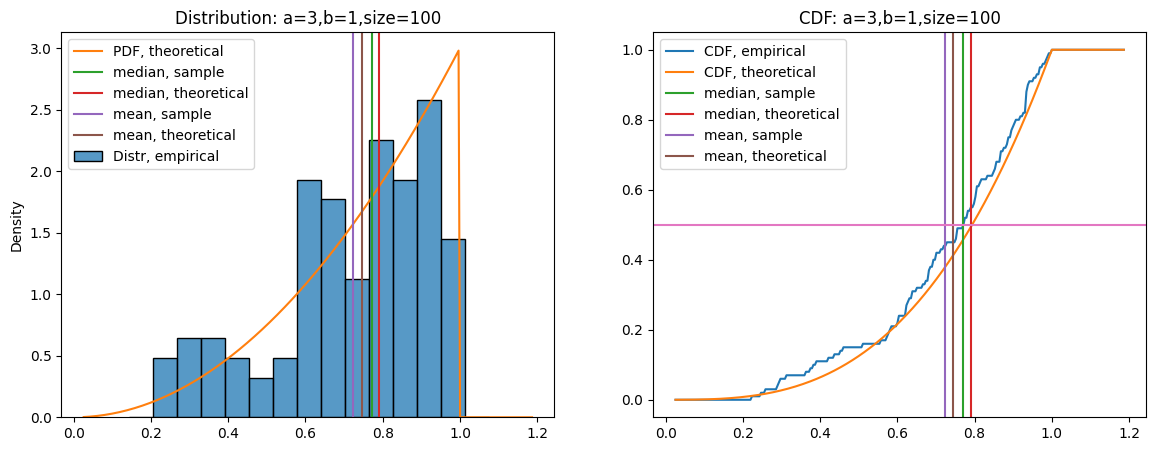

<Figure size 640x480 with 0 Axes>

In [285]:
from scipy.stats import beta 

a,b = 3,1

results = simulate_distribution(sample_size=100, scipy_object = beta, a=a, b=b)

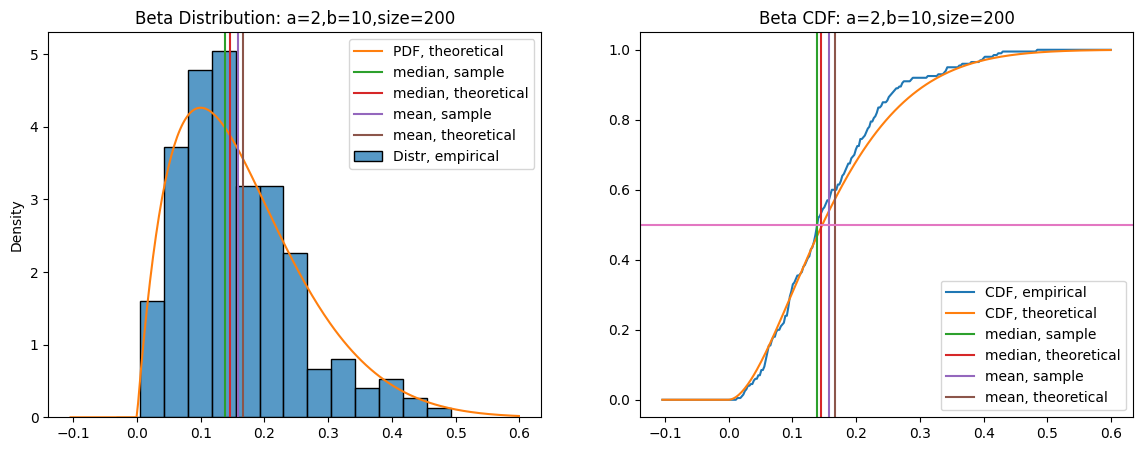

<Figure size 640x480 with 0 Axes>

In [283]:
from numpy.random import beta

a,b = 2, 10

pdf_beta = lambda x: x**(a-1) * (1-x)**(b-1) / Beta(a,b) if x>0 and x<1 else 0

results = simulate_distribution_numpy(
    sample_size = 200,
    np_rng = beta,
    a=a,
    b=b,
    pdf_lambda = pdf_beta,
    name = 'Beta',
)

---
# 7. Poisson

$$ X \sim \text{Pois}(\lambda) \, \text{ for } \, \lambda > 0$$
A discrete distribution to model the number of events that occur, given $\lambda$ the rate of occurrence (eg. the number of rain drops that hit the rooftop per second)

## 7.1. Parameters
- $\lambda$: event rate / the expected number of events to occur
- `scipy.stats`: `mu`
- `numpy.random`: `lam`

## 7.2. PMF
$$ \begin{equation} P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} \end{equation}$$

## 7.3. Statistics
$$\begin{equation}\begin{aligned}
\mathrm E[X] &= \lambda \\
\mathrm{Var}[X] &= \lambda
\end{aligned} \end{equation}$$

## 7.4. Proofs

### 7.4.1. Proof that PMF sums to 1

$$\begin{aligned} 
\sum_{k=0}^\infty P(X=k) &= \sum_{k=0}^\infty \frac{\lambda^k e^{-\lambda}}{k!} \\
    &= e^{-\lambda} \sum_{k=0}^\infty \frac{\lambda^k}{k!} \\
    &= e^{-\lambda} e^\lambda & \text{Taylor series of } e^\lambda \\
    &= 1
\end{aligned}$$

### 7.4.2. Proof of Mean

$$\begin{aligned} 
\mathrm E[X] &= \sum_{k=0}^\infty k \cdot P(X=k) \\
    &= \sum_{k=0}^\infty k \cdot \frac{\lambda^k e^{-\lambda}}{k!} \\
    &= 0 + \sum_{k=1}^\infty \lambda \cdot \frac{\lambda^{k-1} e^{-\lambda}}{(k-1)!} \\
    &= \lambda \cdot \sum_{k=0}^\infty \frac{\lambda^k e^{-\lambda}}{k!} & \text{re-index} \\
    &= \lambda & \text{summation of PMF is 1}
\end{aligned}$$

### 7.4.3. Proof of Variance

$$\begin{aligned} 
\mathrm E[X^2] &= \sum_{k=0}^\infty k^2 \cdot P(X=k) \\
    &= \sum_{k=0}^\infty k^2 \cdot \frac{\lambda^k e^{-\lambda}}{k!} \\
    &= 0 + \sum_{k=1}^\infty \lambda k\cdot \frac{\lambda^{k-1} e^{-\lambda}}{(k-1)!} \\
    &= \lambda \cdot \sum_{k=0}^\infty (k+1) \cdot \frac{\lambda^k e^{-\lambda}}{k!} & \text{re-index} \\
    &= \lambda \left( \sum_{k=0}^\infty k \cdot \frac{\lambda^k e^{-\lambda}}{k!} + \sum_{k=0}^\infty \frac{\lambda^k e^{-\lambda}}{k!} \right) \\
    &= \lambda(\lambda + 1) \\
\mathrm{Var}[X] &= \mathrm E[X^2] - \mathrm E[X]^2 \\
    &= \lambda(\lambda+1) - \lambda^2 \\
    &= \lambda
\end{aligned}$$

## 7.5. Simulation

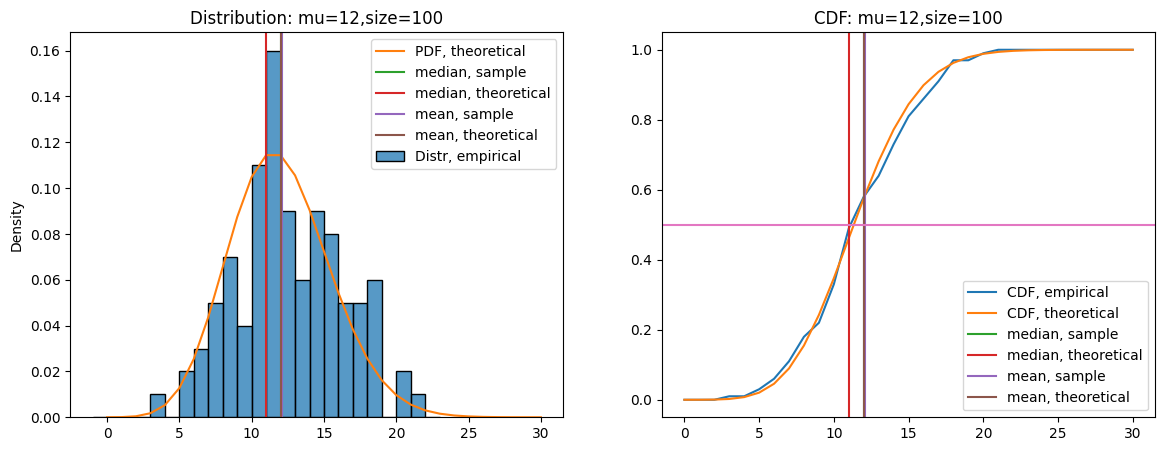

<Figure size 640x480 with 0 Axes>

In [287]:
from scipy.stats import poisson 

mu=12

results = simulate_distribution(sample_size=100, scipy_object = poisson, mu=mu)

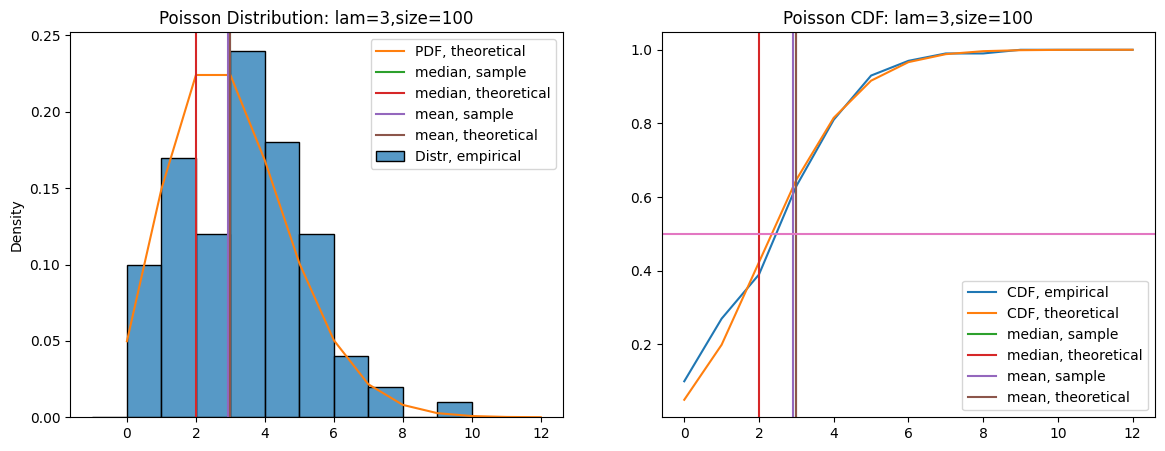

<Figure size 640x480 with 0 Axes>

In [291]:
from numpy.random import poisson

lam = 3
pmf_poisson = lambda x: lam**x * exp(-lam) / factorial(x) if x>= 0 else 0

results = simulate_distribution_numpy(
    sample_size=100, 
    np_rng = poisson, 
    lam=lam, 
    pdf_lambda = pmf_poisson,
    name = 'Poisson',
)

### 7.5.1 Similarity to Binomial Distribution, for large $n$

For large $n$, we can approximate the Binomial distribution with a Poisson distribution with $\lambda = np$.

(Look up Poisson Limit Theorem online)

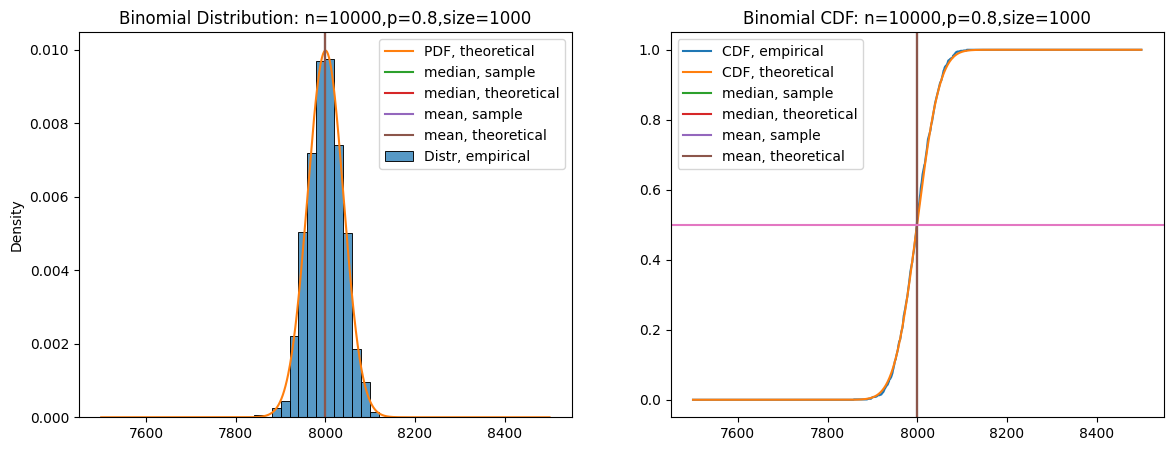

<Figure size 640x480 with 0 Axes>

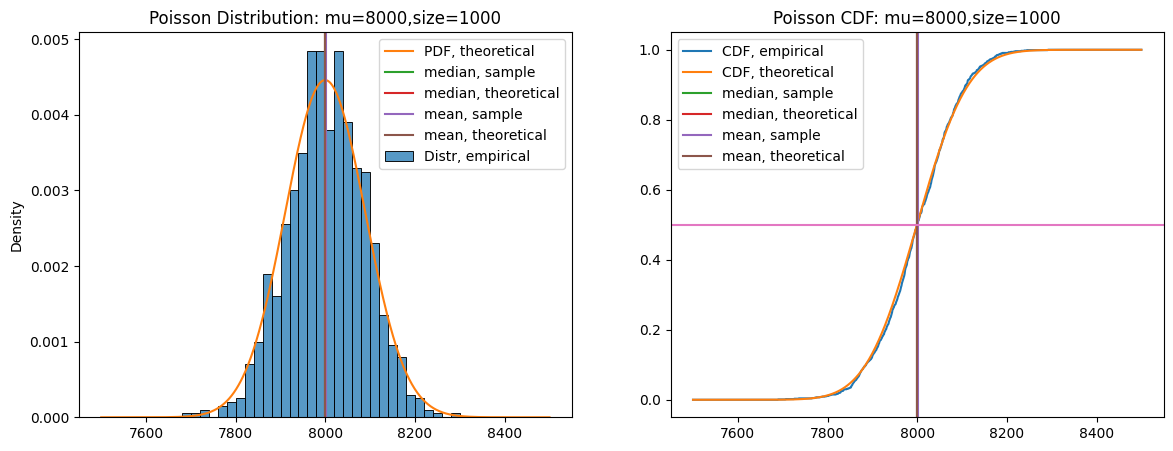

<Figure size 640x480 with 0 Axes>

In [215]:
n=10000
p=0.8
mu = int(n*p)

support = np.arange(7500, 8501)
bins = np.arange(7500, 8501, 20)

results = simulate_distribution(sample_size=1000, scipy_object = binom, n=n, p=p, name='Binomial',
                               support=support, bins=bins)
results = simulate_distribution(sample_size=1000, scipy_object = poisson, mu=mu, name='Poisson',
                               support=support, bins=bins)


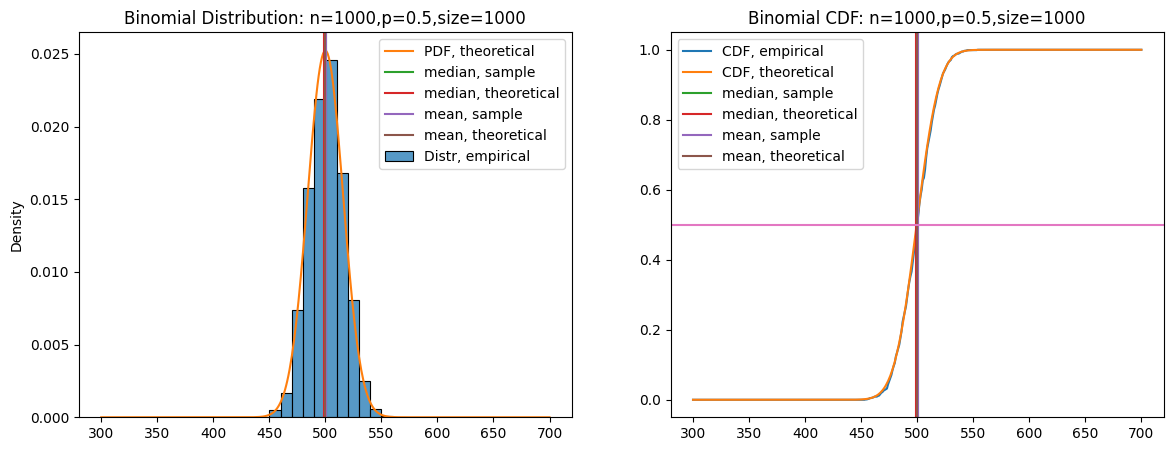

<Figure size 640x480 with 0 Axes>

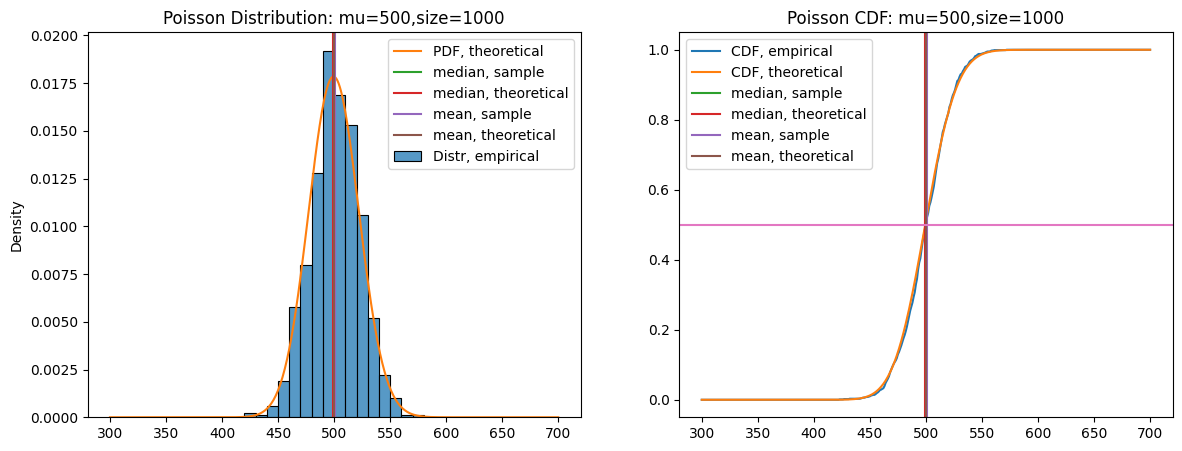

<Figure size 640x480 with 0 Axes>

In [205]:
n=1000
p=0.5
mu = int(n*p)

support = np.arange(300, 701)
bins = np.arange(300, 701, 10)

results = simulate_distribution(sample_size=1000, scipy_object = binom, n=n, p=p, name='Binomial',
                               support=support, bins=bins)
results = simulate_distribution(sample_size=1000, scipy_object = poisson, mu=mu, name='Poisson',
                               support=support, bins=bins)


---
# 8. Exponential

$$ X \sim \text{Expo}(\lambda)$$

The distance between points in an Poisson distribution with rate $\lambda$.

$$  \text{Expo}(\lambda) \, \equiv \, \frac1\lambda \text{Expo}(1) $$
$$ \text{Expo}(1) \, \equiv \, -\ln \left( \mathcal U(0,1) \right) $$

Can scale Exponential distribution into one another.  Exponential distribution connected to Uniform distribution.

## 8.1. Parameters
- $\lambda$ (`1/scale`): the rate parameter. the expected number of occurrences in the Poisson distribution (the expected frequency of events)
$$ \text{Expo}(\lambda) \equiv \frac1\lambda \text{Expo}(1)$$
- offset `loc`: shifts distribution to the right by `loc`. minimum value of variable would be `loc`

## 8.2. PDF and CDF
$$ \begin{equation} \begin{aligned} 
f(x, \lambda) &= \lambda e^{-\lambda x} \, \space\space \text{ for } \, x \ge 0 \\
F(x, \lambda) &= 1 - e^{-\lambda x} 
\end{aligned} \end{equation}$$

## 8.3. Statistics
$$ \begin{equation} \begin{aligned}
\mathrm E[X] &= \frac{1}{\lambda}  \\
\mathrm{Var}[X] &= \frac1{\lambda^2} \\
\end{aligned} \end{equation}$$

## 8.4. Proofs, and Other Properties

We note that the Exponential distribution has the following neat properties:
- Memorylessness
- Minimum of independent Exponential random variables is also an Exponential random variable
- Equivalence to scale of $\text{Expo}(1)$
- Connection to Uniform distribution

### 8.4.1. PDF Integrates to 1

$$ \begin{aligned}
\int_0^\infty f(x,\lambda) \, dx &= \int_0^\infty \lambda e^{-\lambda x} \, dx \\
    &= \left[ - e^{-\lambda x} \right]_0^\infty \\
    &= -(0 - 1) = 1
\end{aligned} $$

### 8.4.2. Proof of CDF

$$ \begin{aligned}
F(x,\lambda) &=  \int_0^x f(y,\lambda) \, dy \\
    &= \int_0^x \lambda e^{-\lambda y} \, dy \\
    &= \left[ - e^{-\lambda y} \right]_0^x \\
    &= -(e^{-\lambda x} - 1) = 1 - e^{-\lambda x}
\end{aligned} $$

### 8.4.3. Proof of Mean

$$ \begin{aligned}
\mathrm E[X] &= \int_0^\infty x \, f(x,\lambda) \, dx = \int_0^\infty x \, \lambda e^{-\lambda x} \, dx \\
    &= \left[ - x \cdot e^{-\lambda x} \right]_0^\infty - \int_0^\infty - e^{-\lambda x} \, dx & \text{integrate by parts: } u=x,\, v=-e^{-\lambda x} \\
    &= -(0 - 0) + \frac1\lambda  \int_0^\infty f(x,\lambda) \, dx & \text{L'Hopital's for when } x\to\infty \\
    & = \frac1\lambda & \text{PDF integrates to 1}
\end{aligned} $$

### 8.4.4. Proof of Variance

$$ \begin{aligned}
\mathrm E[X^2] &= \int_0^\infty x^2 \, f(x,\lambda) \, dx = \int_0^\infty x^2 \, \lambda e^{-\lambda x} \, dx \\
    &= \left[ - x^2 \cdot e^{-\lambda x} \right]_0^\infty - \int_0^\infty - 2x \, e^{-\lambda x} \, dx & \text{integrate by parts: } u=x^2,\, v=-e^{-\lambda x} \\
    &= -(0 - 0) + \frac2\lambda  \int_0^\infty x f(x,\lambda) \, dx & \text{L'Hopital's for when } x\to\infty \\
    & = \frac2{\lambda^2} & \text{integral is expected value} \\
\mathrm{Var}[X] &= \mathrm E[X^2] - \mathrm E[X]^2 = \frac2{\lambda^2} - \frac1{\lambda^2} = \frac1{\lambda^2}
\end{aligned} $$

### 8.4.5. Memorylessness

$$ \begin{equation} P(X > t+s \, | \, X>s) = P(X>t) \end{equation} $$

Eg.  Say the distribution of the time to wait until the next bus is exponential.  The probability that the bus comes in the next 5 minutes is the same as the probability that the bus comes in the next five minutes, if you've already waited 20 minutes.

#### Proof:

$$ \begin{aligned}
P(X > t+s \, | \, X>s) &= \frac{ P(X > t+s \, \cap \, X>s)}{P(X>s)} \\
    &= \frac{P(X>t+s)}{P(X>s)} \\
    &= \frac{1 - F(t+s, \lambda)}{1 - F(s, \lambda)} \\
    &= \frac{\exp(-\lambda \, (t+s))}{\exp(-\lambda \,s)} & \text{formula for CDF} \\
    &= \exp(-\lambda t) \\
    &= 1 - F(t, \lambda) = P(X > t)
\end{aligned}$$

### 8.5.6. Minimum of Independent Exponential RVs

Let $X = \min \{X_i\}_{i=1}^n$, where $X_i \sim \text{Expo}(\lambda_i)$ and are all independent. Then 
$$ \begin{equation} X \sim \text{Expo}(\lambda_1 + \cdots + \lambda_n) \end{equation}$$

We note that the same cannot be said about the maximum of the random variables.

#### Proof

We show X has the same CDF as $\text{Expo}(\lambda_1 + \cdots + \lambda_n)$:

$$\begin{aligned}
P(X < x) &= 1 - P(X > x) \\
    &= 1 - P(X_i > x \, \forall \, i\,) \\
    &= 1 - \prod_{i=1}^n P(X_i > x) \\
    &= 1 - \prod_{i=1}^n \exp(-\lambda_i x) \\
    &= 1 - \exp\left( -x \, \sum_{i=1}^n \lambda_i \right)
\end{aligned}$$

### 8.5.7.  Equivalence to Scale of Expo(1)

$$ \begin{equation} \text{Expo}(\lambda) \equiv \frac1\lambda \, \text{Expo}(1) \end{equation}$$

A random variable with distribution $\text{Expo}(\lambda)$ is equivalent to a random variable with distribution $\text{Expo}(1)$, scaled by a factor of $\frac1\lambda$.

#### Proof.

Let $X \sim \text{Expo}(\lambda), \, Y \sim \text{Expo}(1)$.  We will show that $X$ and $Z := (\frac1\lambda \cdot Y)$ have the same CDF.
$$ \begin{aligned}
F_X(t) &= 1 - e^{-\lambda t} \\
F_Z(t) &= P(Z < t) \\
    &= P\left( \frac{Y}{\lambda} < t \right) = P(Y < \lambda \, t ) = F_Y(\lambda \, t) \\
    &= 1 - e^{-\lambda t}
\end{aligned} $$

### 8.5.8. Connection to Uniform distribution

Let $X \sim \text{Expo}(1)$ an Exponential r.v., and $U \sim \mathcal{U}(0,1)$ a standard Uniform r.v.  Then 
$$ \begin{equation} X \, \equiv \, -\ln U \end{equation}$$

#### Proof.

We will show $X$ and $Y:= -\ln U$ have the same CDF.

$$ \begin{aligned}
F_X(t) &= 1 - e^{-t} \\
F_Y(t) &= P(Y < t) = P(-\ln U < t) \\
    &= P(U > e^{-t}) \\
    &= 1 - e^{-t} 
\end{aligned} $$

## 8.5. Simulation

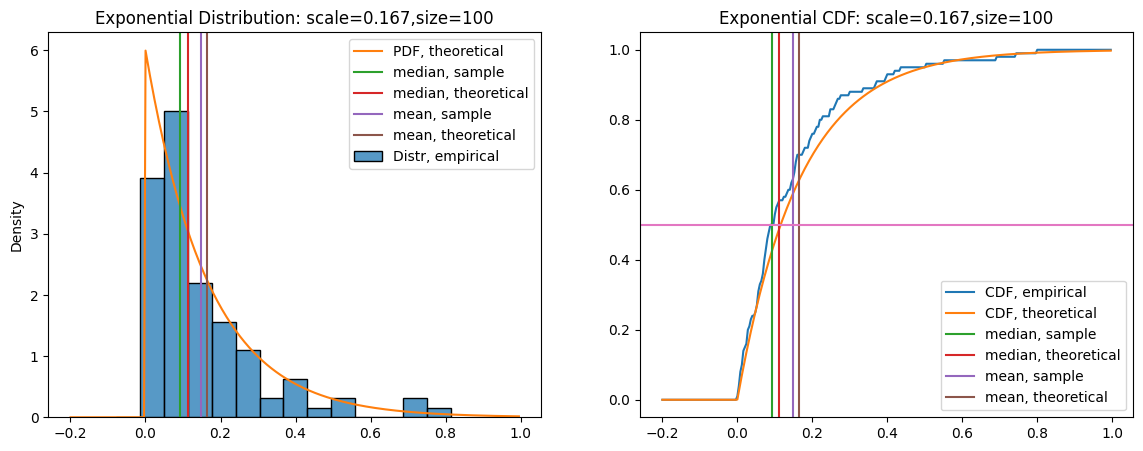

(0.14813837943421784, 0.15821447018260623)

<Figure size 640x480 with 0 Axes>

In [297]:
from scipy.stats import expon 

lam = 6
scale = 1/lam

results = simulate_distribution(sample_size=100, scipy_object = expon, scale=scale, name='Exponential')

results[0].mean(), results[0].std()

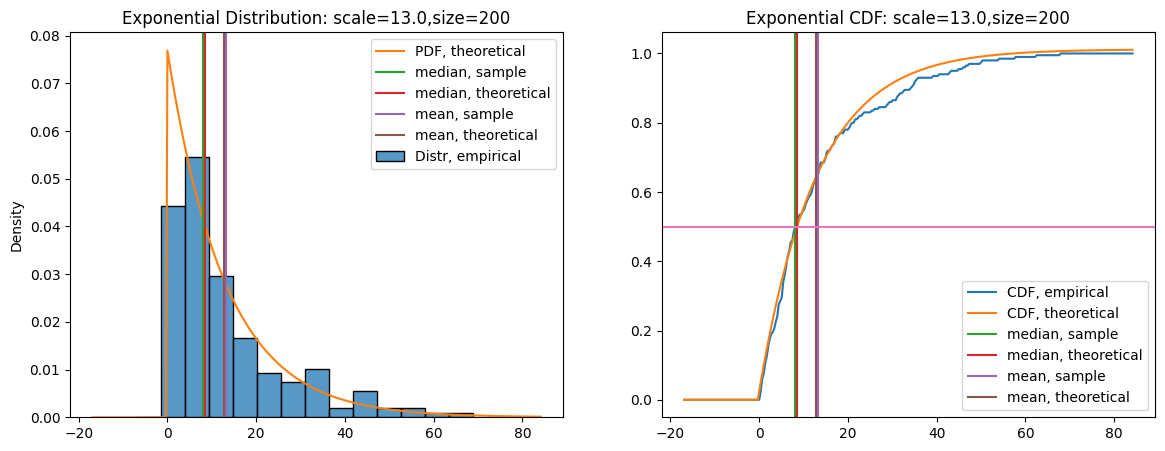

<Figure size 640x480 with 0 Axes>

In [299]:
from numpy.random import exponential

lam = 1/13

pdf_expo = lambda x: lam * exp(-lam * x) if x>=0 else 0

results = simulate_distribution_numpy(
    sample_size = 200,
    np_rng = exponential,
    scale = 1/lam,
    pdf_lambda = pdf_expo,
    name = 'Exponential',
)

---
# 9. Erlang (Erlang-k)

$$ X \sim \text{Erlang}(k, \lambda) \equiv E_k(\lambda) \, \text{ for } \, k\in \mathbb N, \, \lambda > 0$$
$$ X \equiv \sum_{i=1}^k X_i, \, \text{ for } \, X_i \sim \text{Expo}(\lambda) \, \text{ i.i.d.} $$

The sum of $k$ independent Exponential random variables with parameter $\lambda$.  Represents the time until the $n$th occurrence of an event following the Poisson distribution with parameter $\lambda$.

## 9.1. Parameters
- $k$ (`a`): the shape (number of i.i.d. Exponential r.v.s being added).  $k \in \mathbb{N}$ an positive integer
- $\lambda$ (`1/scale`): the rate
- `loc`: shifts distribution to right

## 9.2. PDF
$$ \begin{equation} 
f(x, k, \lambda) = \frac{\lambda^k \, x^{k-1} \, e^{-\lambda x}}{(k-1)!} \, \text{ for } \, x,\lambda >= 0 
\end{equation}$$

## 9.3. Statistics
$$ \begin{equation}\begin{aligned}
\mathrm E[X] &= \frac k\lambda \\
\mathrm{Var}[X] &= \frac k{\lambda^2}
\end{aligned}\end{equation} $$

## 9.4. Proofs

### 9.4.1. Derivation of PDF, from Definition of Erlang Distribution

We derive the PDF of the Erlang distribution, from the definition of the Erlang Distribution as the sum of $k$ iid Exponential variables.  We use induction on $k$.


We will use induction on $k$, the shape parameter. 

**Base Case: $k=1$**

We verify that the PDF when $k=1$ matches the PDF of the Exponential distribution
$$ f(x,1,\lambda) = \frac{\lambda^1 \, x^{1-1} \, e^{-\lambda x}}{(1-1)!} = \frac{\lambda \cdot 1 \cdot e^{-\lambda x}}{1}
= \lambda e^{-\lambda x}$$

**Lemma: a note on integrals**

We have function $f$ with derivative $f'$.  We have function $g$ defined as  $ g(x) = \int_0^x f'(y) \, dy $.
Then $g(x)$ evaluates to 
$$ g(x) = \int_0^x f'(y) \, dy = \left[ f(y) \right]_0^x = f(x) - f(0) $$
Then the derivative of $g$ is:
$$ \begin{equation} \frac{dg}{dx} = g'(x) = f'(x) \end{equation} $$

**Inductive Step:**

Let us assume that the for $k=n$, the PDF of the Erlang-k distribution is 
$$ f(x,n,\lambda) = \frac{ \lambda^n \, x^{n-1} \, e^{-\lambda x}}{(n-1)!} $$

We now look at the CDF of the $k=n+1$ case.  We note that for $X \sim \text{Erlang}(n+1, \lambda)$ we can write $X = X_1 + \cdots X_{n+1}$ for $X_i \sim \text{Expo}(\lambda)$ i.i.d.

$$ \begin{aligned} 
F(x, n+1, \lambda) &= P((X_1 + \cdots + X_n) + X_{n+1} < x) \\
    &= \int_0^x P(X_{n+1} < x-y) \cdot f(y, n, \lambda) \, dy 
        & \text{integrate over possible values of } (X_1+\cdots+X_n) \\
    &= \int_0^x \left( 1 - e^{-\lambda (x-y)} \right) \cdot \frac{ \lambda^n \, y^{n-1} \, e^{-\lambda y}}{(n-1)!} \, dy 
        & \text{CDF of Expon. Distribution, and inductive PDF assumption}\\
    &= \frac{\lambda^n}{(n-1)!} \, \left( \int_0^x y^{n-1} \, e^{-\lambda y} \, dy - \int_0^x y^{n-1} \, e^{-\lambda x} \, dy \right) \\
    &= \frac{\lambda^n}{(n-1)!} \, \left( \int_0^x y^{n-1} \, e^{-\lambda y} \, dy - \left[ \frac1n y^n e^{-\lambda x} \right]_0^x \right) \\
    &= \frac{\lambda^n}{(n-1)!} \, \left( \int_0^x y^{n-1} \, e^{-\lambda y} \, dy - \frac1n x^n e^{-\lambda x}  \right) \\ \\
f(x, n+1, \lambda) &= F'(x, n+1, \lambda) \\
    &= \frac{\lambda^n}{(n-1)!} \, \left( x^{n-1} \, e^{-\lambda x} - \frac1n \left( n \, x^{n-1} e^{-\lambda x} - \lambda x^{n} e^{-\lambda x} \right) \right) 
        & \text{utilizing the lemma from above}\\
    &= \frac{\lambda^n}{(n-1)!} \, \left( \frac1n \cdot \lambda \cdot x^n \, e^{-\lambda x} \right) = \frac{\lambda^{n+1} \, x^n \, e^{-\lambda x}}{n!}
\end{aligned} $$
which matches the desired form, thus completing the inductive step.

Therefore, the PDF formula is correct for all $k\in\mathbb N$

### 9.4.2. Proof that PDF Integrates to 1

We offer two proofs that the PDF integrates to 1:  one involving induction on $k$ and the other utilizing the definition of the Gamma function.

#### 9.4.2.1.  Induction on $k$

We want to verify that 
$$ \int_0^\infty f(x, k, \lambda) \, dx = \int_0^\infty \frac{\lambda^k \, x^{k-1} \, e^{-\lambda x}}{(k-1)!} \, dx = 1 $$

We will equivalent show, with induction, that for all $ k \in \mathbb N$
$$ \int_0^\infty x^{k-1} \, e^{-\lambda x} \, dx = \frac{(k-1)!}{\lambda^k}  $$

**Base Case: $k=1$**
The base case follows trivially.

$$ \int_0^\infty x^{1-1} e^{-\lambda x} \, dx = \frac1\lambda $$

**Inductive Step:**
Let us assume that the equation holds for $k=n$:
$$ \int_0^\infty x^{n-1} e^{-\lambda x} \, dx = \frac{(n-1)!}{\lambda^n} $$

Then for $k=n+1$:
$$ \begin{aligned}
\int_0^\infty x^{(n+1)-1} e^{-\lambda x} \, dx &= \left[ \frac{-1}\lambda \, x^n \, e^{-\lambda x} \right]_0^\infty - \int_0^\infty \frac{-n}\lambda \, x^{n-1} e^{-\lambda x} \, dx 
        & \text{integration by parts: } u=x^n, \, v= \frac{-1}\lambda e^{-\lambda x} \\
    &= (0-0) + \frac{n}\lambda \cdot \frac{(n-1)!}{\lambda^n} 
        & \text{L'Hopital's for } x\to\infty \, \text{, induction} \\
    &= \frac{n!}{\lambda^{n+1}}
\end{aligned} $$

#### 9.4.2.2. Utilizing definition of Gamma function

We incorporate the Gamma function into the PDF

$$ f(x, k, \lambda) = \frac{\lambda^k \, x^{k-1} \, e^{-\lambda x}}{(k-1)!} =  \frac{\lambda^k \, x^{k-1} \, e^{-\lambda x}}{\Gamma(k)}$$

since $k$ is a positive integer. 

The proof follows as in Section 11.4.1, in which we verify that the PDF of the Gamma distribution integrates to 1.

### 9.4.3. Proof of Mean and Variance 

#### 9.4.3.1. Simple Proof
The Mean and Variance follow trivially from the definition of the Erlang distribution as the sum of i.i.d. Exponential random variables, since expectation is linear, and variance is linear for independent variables.

#### 9.4.3.2. Brute-ish Force Proof
We can also do the classic integration approach, utilizing our work from 9.4.2. by noting that the PDF integrates to 1 over the support:
$$ \begin{aligned} 
\mathrm E[X] &= \int_0^\infty x \cdot \frac{\lambda^k \, x^{k-1} \, e^{-\lambda x}}{(k-1)!} \, dx \\
    &= \frac k\lambda \cdot \int_0^\infty \frac{\lambda^{k+1} \, x^{k} \, e^{-\lambda x}}{k!} \, dx \\
    &= \frac k\lambda 
        & \text{integral of PDF from } (k+1) \text{ case} \\
\mathrm E[X^2] &= \int_0^\infty x^2 \cdot \frac{\lambda^k \, x^{k-1} \, e^{-\lambda x}}{(k-1)!} \, dx \\
    &= \frac {k(k+1)}{\lambda^2} \cdot \int_0^\infty \frac{\lambda^{k+2} \, x^{k+1} \, e^{-\lambda x}}{(k+1)!} \, dx \\
    &= \frac {k(k+1)}{\lambda^2} 
        & \text{integral of PDF from } (k+2) \text{ case} \\
\mathrm{Var}[X] &= \mathrm E[X^2] - \mathrm E[X]^2 \\
    &= \frac {k(k+1)}{\lambda^2} - \frac{k^2}{\lambda^2} = \frac k{\lambda^2}
\end{aligned} $$

## 9.5. Simulation

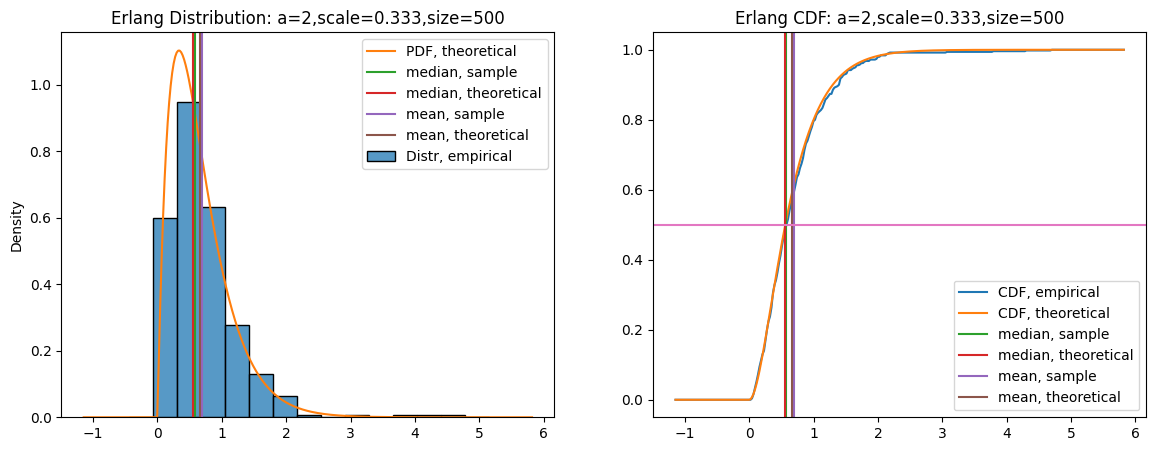

(0.6958151409130698,
 0.6666666666666666,
 0.5410960104659706,
 0.4714045207910317)

<Figure size 640x480 with 0 Axes>

In [228]:
from scipy.stats import erlang 

a = 2
scale = 1/3

results = simulate_distribution(sample_size=500, scipy_object = erlang, a=a, scale=scale, name='Erlang')

results[0].mean(), a*scale, results[0].std(ddof=1), np.sqrt(a*scale**2)

---
# 10. Chi-Squared

$$ X \sim \chi_k^2 \, \equiv \, \chi^2(k) $$

The $\chi^2$ distribution with $k$ degrees of freedom is the sum of the squares of $k$ independent standard normal random variables.

$$ X \, \equiv \, \sum_{i=1}^k Z_i \, \text{ for } \, Z_i \sim \mathcal N(0,1) \, \text{ i.i.d.} $$

## 10.1. Parameters
- $k$ (`df`): degrees of freedom. the number of squares of standard normal random variables being added
- `loc`,`scale` to shift the distribution (same `loc`,`scale` from `gamma` distribution)

## 10.2. PDF
$$ \begin{equation} f(x,k) = \frac{ x^{k/2 - 1} \, e^{-x/2} }{ 2^{k/2} \, \Gamma( k/2 ) } \end{equation}$$
for $\Gamma$ the Gamma function:  $ \Gamma(x) = \int_0^\infty t^{x-1} \, e^{-t} \, dt$

## 10.3. Statistics
$$ \begin{equation} \begin{aligned}
\mathrm E[X] &= k \\
\mathrm{Var}[X] &= 2k
\end{aligned} \end{equation}$$

## 10.4. Proofs

### 10.4.1. Derivation of PDF

Let $f_Z$ be the PDF of the standard normal distribution.  $f_Z(z) = \frac1{\sqrt{2\pi}} e^{-z^2/2}$.  

Using differentials: 
$$ f(x, k) \, dx = \int_\mathcal V  \prod_{i=1}^k  \left( f_Z(z_i) \, dz_i \right) $$
where $\mathcal V$ is the $(k-1)$ sphere in $k$-dimensional space with radius $\sqrt{x}$.  

In other words, if $X \sim \chi^2_k$ then we can write  $ \, X = \sum_{i=1}^k Z_i^2 \, $ for $Z_i$ independent standard normal random variables.  We define the $k$-dimensional space as the space of possible values for $(Z_1, \ldots, Z_k)$.  

$f(x,k) \, dx$ is the probability that $X$ is infinitessimally close to $x$.  This is equal to the probability that $(Z_1, \ldots, Z_k)$ lies infinitessimally close to the $(k-1)$ sphere in $k$-dimensional space with radius $\sqrt{x}$.

$$ 
\begin{aligned} 
f(x, k) \, dx &= \int_\mathcal V  \prod_{i=1}^k f_Z(z_i) \, dz_i \\
    &= \int_\mathcal{V} \frac{ \exp\left( -\frac{z_1^2 + \cdots + z_k^2}{2} \right) }{ (2\pi)^{k/2}} \, dz_1 \cdots dz_k \\
    &= \frac{ \exp(-x / 2) }{ (2\pi)^{k/2} } \int_\mathcal{V} dz_1 \cdots dz_k 
        & (x = z_1^2 + \cdots + z_k^2) \\
    &= \frac{ \exp(-x / 2) }{ (2\pi)^{k/2} } \cdot S_{k-1} \, r^{k-1} \, dr   &(*) \\
    &= \frac{ \exp(-x / 2) }{ (2\pi)^{k/2} } \cdot S_{k-1} \, x^{(k-1)/2} \cdot \frac12 x^{-1/2} \, dx
        & \left( r=\sqrt{x}, \, dr = \frac12 x^{-1/2} \, dx \right) \\
    &= \frac{ \exp(-x / 2) }{ (2\pi)^{k/2} } \cdot \frac{2 \, \pi^{k/2}}{\Gamma(k/2)} \cdot x^{(k-1)/2} \cdot \frac12 x^{-1/2} \, dx
        & (**) \\
    &= \frac{ x^{(k/2)-1} \, e^{-x/2} }{2^{k/2} \, \Gamma(k/2) } \, dx
\end{aligned} 
$$

$$
\begin{aligned}
(*)&  \,  \text{ integral is  surface area of  } (k-1) \text{-sphere with radius } r=\sqrt{x} \text{, scaled by infinitessimal thickness } dr \\
(**)& \text{ substituting in formula for surface area of } \, (k-1)-\text{sphere in } \, k \text{-dimensional space, } \, S_{k-1} = \frac{ 2 \, \pi^{k/2}}{\Gamma(k/2)} \, \text{ (see 10.4.5)}
\end{aligned}
$$


### 10.4.2. Verify that PDF Integrates to 1

We want to show that 
$$ \int_0^\infty f(x,k) \, dx= \int_0^\infty \frac{ x^{k/2 - 1} \, e^{-x/2} }{ 2^{k/2} \, \Gamma( k/2 ) } \, dx = 1 $$

We will equivalently show that 
$$ \int_0^\infty x^{k/2 - 1} \, e^{-x/2} \, dx =  2^{k/2} \, \Gamma( k/2 )  $$

$$ \begin{aligned}
RHS &= 2^{k/2} \, \Gamma( k/2 ) \\
    &= 2^{k/2} \, \int_0^\infty t^{k/2-1} \, e^{-t} \, dt 
        & \text{Gamma function definition} \\
    &= 2^{k/2} \, \int_0^\infty (x/2)^{k/2-1} e^{-x/2} \, \frac12 \, dx 
        & \text{substitute } t = x/2 \\
    &= \int_0^\infty x^{k/2 - 1} \, e^{-x/2} \, dx = LHS
\end{aligned} $$

### 10.4.3. Mean $\mathrm E[X] = k$

We note that for $Z$ standard normal,
$$ \mathrm E[Z^2] = \mathrm{Var}[Z] + \mathrm E[Z]^2 = 1 + 0 = 1 $$

Since $X$ is the sum of $k$ i.i.d. $Z$, and since expectation is linear, it follows that $\mathrm E[X] = k$.

### 10.4.4. Variance $\mathrm{Var}[X] = 2k$

To find the 4th moment of $Z$ the standard normal, we use the *moment generating function*
$$ \begin{equation}
M_Z(t) = \mathrm E\left[ e^{tX} \right]  = \int_{-\infty}^\infty e^{tx} f(x) \, dx
\end{equation}$$
utilizing the Laplace transform, since $Z$ is continuous.

$$ \begin{aligned} 
M_Z(t) &= \int_{-\infty}^\infty e^{tx} f(x) \, dx \\
    &= \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} \, \exp\left( - \frac{x^2 - 2tx}2 \right) \, dx \\
    &= \exp \left( \frac{t^2}2 \right) \, \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} \, \exp\left( - \frac{(x-t)^2}2 \right) \, dx \\
    &= \exp \left( \frac{t^2}2 \right)
        & \text{integral is of PDF of } \, \mathcal{N}(t,1)
\end{aligned} $$

The fourth moment is $M_Z^{(4)}(0)$. We take the 4th derivative of $M_Z(t)$ and evaluating at 0: 
$$ M_Z^{(4)}(t) = e^{t^2/2} \cdot ( 3 + 6t^2 + t^4)  \, \rightarrow \, M_Z^{(4)}(0) = 3 $$

Thus, the variance of $Z^2$ is 
$$ \mathrm{Var}[Z^2] = \mathrm E[Z^4] - \mathrm E[Z^2]^2 = 3 - 1 = 2 $$

Since $X$ is the sum of $k$ independent $Z^2$ random variables, the variance of $X$ is equal to the sum of the variances.
$$ \mathrm{Var}[X] = \sum_{i=1}^k \mathrm{Var}[Z_i^2] = 2k $$

### 10.4.5. Sidequest into $n$-spheres

In $n$-dimensional space, an $n$-sphere of radius $r$ is the set of points satisfying $\sum_{i=1}^n x_i^2 <= r^2$.

Let us denote: 
- $V_n(r) \,$ the $n$-dimensional volume of the $n$-sphere with radius $r$
- $S_{n-1}(r) \,$ the $(n-1)$-dimensional surface area of the $n$-sphere with radius $r$

We will show that:
$$\begin{equation}\begin{aligned} 
V_n(r) &= \frac{\pi^{n/2}}{\Gamma\left(\frac n2 + 1 \right)} \, r^n = \frac{2 \, \pi^{n/2}}{n \, \Gamma\left(\frac n2 \right)} \, r^n\\
S_{n-1}(r) &= \frac{ 2 \, \pi^{n/2}}{\Gamma\left( \frac n2 \right)} \, r^{n-1}
\end{aligned}\end{equation}$$

#### 10.4.5.1. Proof of $V_n$

We want to show that 
$$ V_n(r) = \frac{\pi^{n/2}}{\Gamma\left(\frac n2 + 1 \right)} \, r^n 
    = \frac{2 \, \pi^{n/2}}{n \, \Gamma\left(\frac n2 \right)} \, r^n $$

We will induct on $n$.  

**Base Cases**: 
We trivially have
$$ \begin{aligned}
V_1(r) &= 2r  & \text{a line segment} \\
V_2(r) &= \pi \, r^2 & \text{definition of } \, \pi \\
\end{aligned} $$

**Inductive Step**:  We assume the formula holds for $V_n(r)$.

To find $V_{n+1}(r)$, we will integrate over the $(n+1)$th dimension $z$.  We compute the volume by adding together $n$-dimensional slices of volume $V_n\left(\sqrt{r^2-z^2}\right)$ and thickness $dz$.

$$ \begin{align}
V_{n+1}(r) &= \int_{-r}^r V_n \left( \sqrt{r^2-z^2} \right) \, dz  \\
    &= \int_{-r}^r \frac{\pi^{n/2}}{\Gamma\left(\frac n2 + 1 \right)} \, \left(\sqrt{r^2-z^2}\right) ^n \, dz \\
    &= \frac{\pi^{n/2}}{\Gamma\left(\frac n2 + 1 \right)} \cdot 2r^{n+1} \int_0^1 \left(\sqrt{1-x^2}\right) ^n \, dx 
        & (z = rx, \, dz = r \, dx), \text{ and noting symmetry across } x=0 \\
    &= \frac{\pi^{n/2}}{\Gamma\left(\frac n2 + 1 \right)} \cdot 2r^{n+1} \int_0^{\pi/2} \cos^{n+1} \theta \, d\theta
        & (x=\sin\theta, dx = \cos\theta \, d\theta) \\
    &= \frac{\pi^{n/2}}{\Gamma\left(\frac n2 + 1 \right)} \cdot 2r^{n+1} \cdot \frac{\Gamma\left(\frac n2 + 1 \right)}{\Gamma\left(\frac{n+1}2 + 1 \right)} \cdot \frac{\sqrt\pi}2
        & \text{Wallis Integrals (see 10.4.5.3)} \\
    &= \frac{\pi^{(n+1)/2}}{\Gamma\left( \frac{n+1}2 + 1 \right) } \cdot r^{n+1}
\end{align} $$

Thus, our formula for $V_n(r)$ holds.

#### 10.4.5.2. Proof of $S_{n-1}$

We want to show that 
$$ S_{n-1}(r) = \frac{ 2 \, \pi^{n/2}}{\Gamma\left( \frac n2 \right)} \, r^{n-1} $$

We note that we could have alternatively computed the volume $V_n$ by adding together the surface areas of the spheres $S_{n-1}(s)$, scaled by the thickness $ds$:
$$ V_n(r) = \int_0^r S_{n-1}(s) \, ds $$
Taking the derivative with respect to $r$, we get:
$$ V_n'(r) = \frac{dV_n(r)}{dr} = S_{n-1}(r) $$

Thus, we arrive at our formula for $S_{n-1}(r)$:
$$ S_{n-1}(r) = \frac{d}{dr} V_n(r) =  \frac{d}{dr} \left( \frac{2 \, \pi^{n/2}}{n \, \Gamma\left(\frac n2 \right)} \, r^n \right) 
= \frac{2 \, \pi^{n/2}}{\Gamma\left(\frac n2 \right)} \, r^{n-1} $$

#### 10.4.5.3.a. Sub-sidequest: Wallis Integrals (via Recursion)


We will show, in two ways, that 
$$ \begin{equation}
W_n := \int_0^{\pi/2} \cos^n \theta \, d\theta = \frac{\Gamma\left(\frac {n+1}2 \right)}{\Gamma\left(\frac{n}2 + 1 \right)} \cdot \frac{\sqrt\pi}2  = \frac12 \cdot \text{B}\left( \frac{n+1}2, \, \frac12 \right)
\end{equation}$$
(In the last equality, we note that $\Gamma(1/2) = \sqrt\pi$.)

In this first method, we utilize recursion of the Wallis Integrals.

**Recursion**

We note that $W_n = \int_0^{\pi/2} \cos^n \theta \, d\theta = \int_0^{\pi/2} \sin^n \theta \, d\theta$.  Then
$$ \begin{align}
W_n &= \int_0^{\pi/2} \sin^n \theta \, d\theta \\
    &= \int_0^{\pi/2} \sin^{n-2} \theta \, (1 - \cos^2 \theta) \, d\theta \\
    &= \int_0^{\pi/2} \sin^{n-2} \theta \, d\theta 
        - \int_0^{\pi/2} \left( \sin^{n-2} \theta \, \cos \theta \right) \, \cos\theta \, d\theta \\
    &= W_{n-2} - \left[ \frac1{n-1} \sin^{n-1} \theta \cdot \cos\theta \right]_0^{\pi/2} 
        + \int_0^{\pi/2} -\frac1{n-1} \sin^{n-1} \theta \cdot \sin\theta \, d\theta
        & (u = \cos\theta, dv = \sin^{n-2} \theta \, \cos\theta) \\
    &= W_{n-2} + (0-0) - \frac 1{n-1} W_n \\
W_n &= \frac{n-1}{n} \, W_{n-2}
\end{align}$$
Starting with $W_0 = \frac\pi2$ and $W_1 = 1$, we get the following cases:
$$\begin{align}
W_{2m} &= \frac{(2m)!}{2^{2m} (m!)^2} \cdot \frac \pi2 \\
W_{2m+1} &= \frac{2^{2m} (m!)^2}{(2m+1)!} 
\end{align}$$

**Refresher of Gamma function**:
We recall the following properties of the Gamma function $\Gamma$ (see 6.4.2):
$$ \begin{equation} \begin{aligned}
\Gamma(1) &= 1 \\
\Gamma(1/2) &= \sqrt\pi \\
\Gamma(x+1) &= x \, \Gamma(x) \\
\Gamma(n) &= (n-1)! \\
\Gamma\left(n+\frac12\right) &= \frac{(2m)! \, \sqrt\pi}{ 2^{2m} \cdot m!} & \text{(applying 2nd and 3rd points)}
\end{aligned} \end{equation}$$

**Incorporating Gamma functions into Recursion**: 
Plugging into the two cases: 
$$\begin{align}
n \, \text{even: } \, W_n &= W_{2m} 
        = \frac{(2m)!}{2^{2m} (m!)^2} \cdot \frac \pi2 \\
    &= \frac{(2m)! \, \sqrt\pi}{2^{2m} \cdot m!} \cdot \frac1{m!} \cdot \frac{\sqrt\pi}2 \\
    &= \frac{\Gamma\left( m+\frac12 \right)}{\Gamma(m+1)} \cdot \frac{\sqrt\pi}2 \\
    &= \frac{ \Gamma\left( \frac {n+1}2 \right) }{ \Gamma\left( \frac{n}2 + 1 \right) } \cdot \frac{\sqrt\pi}2 \\
n \, \text{odd: } \, W_n &= W_{2m+1} 
        = \frac{2^{2m} (m!)^2}{(2m+1)!} \\
    &= \frac{m!}{ \frac{(2(m+1))! \, \sqrt\pi}{2^{2(m+1)}\,(m+1)!} } \cdot \frac {\sqrt\pi} 2 \\
    &= \frac{\Gamma\left( m+1 \right)}{\Gamma(m+1+\frac12)} \cdot \frac{\sqrt\pi}2 \\
    &= \frac{ \Gamma\left( \frac {n+1}2 \right) }{ \Gamma\left( \frac{n}2 + 1 \right) } \cdot \frac{\sqrt\pi}2 \\
\end{align}$$

#### 10.4.5.3.b. Sub-sidequest: Wallis Integrals (via Beta function)


We will now instead utilize the Beta function to arrive at the Wallis Integrals.

We recall the Beta and Gamma functions:
$$ \begin{align}
\text{B}(a,b) = \int_0^1 t^{a-1} (1-t)^{b-1} \, dt = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)} \, \text{ for } \, \Re(a),\, \Re(b)>0 \\
\end{align} $$

Focussing on the Beta function
$$ \begin{align}
\text{B}(a,b) &= \int_0^1 t^{a-1} (1-t)^{b-1} \, dt  \\
    &= \int_0^{\pi/2}  \sin^{2(a-1)} \theta \, \cos^{2(b-1)} \theta \cdot 2 \sin\theta \, \cos\theta \, d\theta 
        & (t = \sin^2 \theta, dt = 2\sin\theta \, \cos\theta \, d\theta) \\
    &= 2 \int_0^{\pi/2} \sin^{2a-1} \theta \, \cos^{2b-1} \theta \, d\theta \\
\end{align}$$
Adapting to the Wallis integrals:
$$ \begin{align}
W_n = \int_0^{\pi/2} \sin^n\theta \, d\theta = \frac12 \, \text{B}\left( \frac {n+1}2 , \frac12 \right) 
= \frac{\Gamma \left( \frac{n+1}2 \right) \Gamma\left(\frac12 \right)}{2 \, \Gamma\left( \frac n2 + 1 \right)}
= \frac{\Gamma \left( \frac{n+1}2 \right) }{ \Gamma\left( \frac n2 + 1 \right)} \cdot \frac{\sqrt\pi}2
\end{align} $$

## 10.5. Simulation

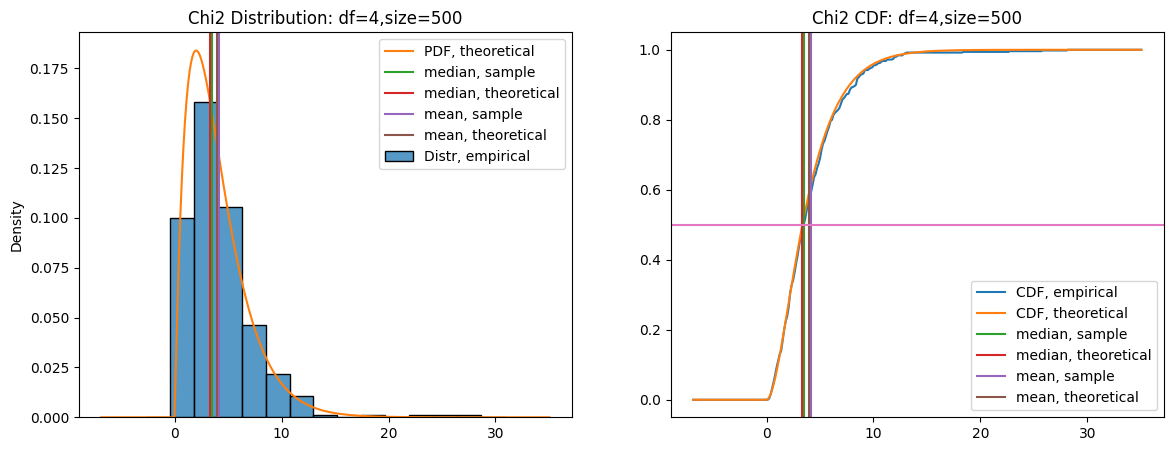

(4.174890845478418, 3.243327861819677, 4, 2.8284271247461903)

<Figure size 640x480 with 0 Axes>

In [232]:
from scipy.stats import chi2 

df=4

results = simulate_distribution(sample_size=500, scipy_object = chi2, df=df, name='Chi2')

results[0].mean(), results[0].std(ddof=0), df, np.sqrt(2 * df)

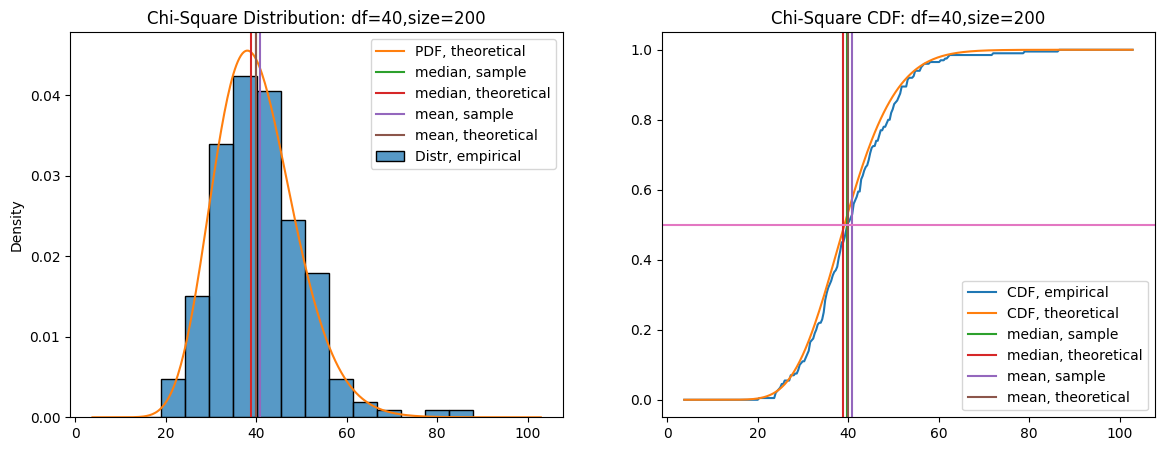

<Figure size 640x480 with 0 Axes>

In [301]:
from numpy.random import chisquare

df=40
pdf_chi2 = lambda x: x**(df/2-1) * exp(-x/2) / (2**(df/2) * Gamma(df/2)) if x>0 else 0

results = simulate_distribution_numpy(
    sample_size = 200,
    np_rng = chisquare,
    df=df,
    pdf_lambda = pdf_chi2,
    name = 'Chi-Square',
)

---
# 11. Gamma

$$ X \sim \text{Gamma}(\alpha, \lambda) \, \text{ for } \alpha,\lambda > 0$$
A generalization of the Exponential, Erlang, and Chi-square distributions.

$$ \begin{align} 
\text{Expo}(\lambda) &\equiv \text{Gamma} (1, \lambda) \\
\text{Erlang}(n, \lambda) &\equiv \text{Gamma} (n, \lambda) \\
\chi_k^2 &\equiv \text{Gamma} (k/2, 1/2)
\end{align} $$

The maximum-entropy distribution for which mean $E[X] = \alpha/\lambda$ is fixed and positive, and $E[\ln X]$ is fixed.

## 11.1. Parameters
- $\alpha$: shape parameter
- $\lambda$: rate parameter
- $\theta = 1/\lambda$: scale parameter
- `scipy.stats` version: `a`,`scale`
- `numpy.random` version: `shape`,`scale`

## 11.2. PDF
$$ \begin{equation}
f(x,\alpha,\lambda) = \frac{\lambda^\alpha}{\Gamma(\alpha)} \, x^{\alpha-1} e^{-\lambda x} \, \propto \, x^{\alpha-1} e^{-\lambda x} 
\end{equation} $$
## 11.3. Statistics
$$ \begin{equation} \begin{aligned}
\mathrm E[X] &= \frac \alpha\lambda \\
\mathrm{Var}[X] &= \frac \alpha{\lambda^2}
\end{aligned} \end{equation} $$

## 11.4. Proofs and Other Properties

### 11.4.1. Verify that PDF Integrates to 1


A refresher of the PDF:
$$ f(x,\alpha,\lambda) = \frac{\lambda^\alpha}{\Gamma(\alpha)} \, x^{\alpha-1} e^{-\lambda x} \, \propto \, x^{\alpha-1} e^{-\lambda x} $$

We will equivalently show that 
$$ \int_0^\infty x^{\alpha-1} e^{-\lambda x} \, dx = \frac{\Gamma(\alpha)}{\lambda^\alpha} $$
where we scale the PDF by the RHS.

$$\begin{align} 
LHS &= \int_0^\infty x^{\alpha-1} e^{-\lambda x} \, dx \\
    &= \int_0^\infty (u/\lambda)^{\alpha-1} e^{-u} \cdot \frac1\lambda du & (x = u/\lambda, \, du = dx/\lambda) \\
    &= \frac 1{\lambda^\alpha} \int_0^\infty u^{\alpha-1} e^{-u} \, du \\
    &= \frac 1{\lambda^\alpha} \, \Gamma(\alpha) = RHS 
\end{align}$$

### 11.4.2. Verify Mean = $\alpha/\lambda$

$$ \begin{align}
\mathrm E[X] &= \int_0^\infty x \cdot \frac{\lambda^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\lambda x} \, dx \\
    &= \frac{\Gamma(\alpha+1)}{\Gamma(\alpha)} \cdot \frac1\lambda \, \int_0^\infty \frac{\lambda^{\alpha+1}}{\Gamma(\alpha+1)} x^{\alpha} e^{-\lambda x} \, dx \\
    &= \frac{\alpha}{\lambda}  & \text{integral is of PDF of Gamma}(\alpha+1,\lambda)
\end{align} $$

### 11.4.3. Verify Variance = $\alpha/\lambda^2$

$$ \begin{align}
\mathrm E[X^2] &= \int_0^\infty x^2 \cdot \frac{\lambda^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\lambda x} \, dx \\
    &= \frac{\Gamma(\alpha+2)}{\Gamma(\alpha)} \cdot \frac1{\lambda^2} \, \int_0^\infty \frac{\lambda^{\alpha+2}}{\Gamma(\alpha+2)} x^{\alpha+1} e^{-\lambda x} \, dx \\
    &= \frac{\alpha(\alpha+1)}{\lambda^2}  & \text{integral is of PDF of Gamma}(\alpha+2,\lambda) \\
\mathrm{Var}[X] &= \mathrm E[X^2] - \mathrm E[X]^2 \\
    &= \frac{\alpha(\alpha+1)}{\lambda^2} - \frac{\alpha^2}{\lambda^2} \\
    &= \frac{\alpha}{\lambda^2}
\end{align} $$

### 11.4.4. Other Properties



For independent variables $X, \, Y$ with 
$$ X \sim \text{Gamma}(a, \lambda), \, Y \sim \text{Gamma}(b, \lambda)$$
then we have the the following: 
- $\begin{equation} W := X + Y \sim \text{Gamma}(a+b, \lambda) \end{equation}$
- $\begin{equation} Z := \frac{X}{X+Y} \sim \text{Beta}(a,b) \end{equation}$
- $\begin{equation} Z \perp W \end{equation}$.  $Z$ and $W$ are independent of each other.

#### 11.4.4.1. Proof: $\, X + Y \sim \text{Gamma}(a+b, \lambda)$

$$ \begin{align}
P(X+Y < w) &= \int_0^w P(X<w-y) \cdot f(y, b, \lambda) \, dy  \\
    &= \int_0^w \int_0^{w-y} f(x, a, \lambda) \, f(y, b, \lambda) \, dx \, dy \\
    &= \int_0^w \int_0^{w-y} \frac{\lambda^{a+b}}{\Gamma(a)\Gamma(b)} \, x^{a-1} \, y^{b-1} \, e^{-\lambda(x+y)} \, dx \, dy \\
    &= \int_0^w \int_0^1 \frac{\lambda^{a+b}}{\Gamma(a)\Gamma(b)} \, u^{a-1}(1-u)^{b-1} \, v^{a+b-2} \, e^{-\lambda v} \, v \, du \, dv 
        & (*) (x = uv, \, y=(1-u)v) \\
    &= \int_0^1 \frac 1{\Gamma(a)\Gamma(b)} u^{a-1}(1-u)^{b-1} \, du \cdot \int_0^w \lambda^{a+b} v^{a+b-1} e^{-\lambda v} \, dv \\
    &= \frac{1}{\Gamma(a+b)} \int_0^w \lambda^{a+b} v^{a+b-1} e^{-\lambda v} \, dv 
        & \text{first integral from Beta distribution} \\
    &= P(W<w) \, \text{ for } \, W \sim \text{Gamma}(a+b, \lambda)
\end{align} $$

$(*)$ for the substitution, we note
$$ \begin{align}
u &= \frac{x}{x+y} \\
w &= x+y \\
dx &= u\,dw + w \, du \\
dy &= (1-u)\,dw - w \, du \\
dx \, dy &= -uw \, dw \, du + (1-u) w \, du \, dw  & \text{wedge product properties} \\
    &= w \, du \, dw
\end{align} $$

#### 11.4.4.2. Proof: $\frac{X}{X+Y} \sim \text{Beta}(a,b)$

$$ \begin{align}
P(\frac{X}{X+Y} < z) &= P(X < \frac{z}{1-z} \cdot Y) \\
    &= \int_0^\infty P(X<\frac{z}{1-z} \cdot y) \cdot f(y, b, \lambda) \, dy  \\
    &= \int_0^\infty \int_0^{\frac{z}{1-z} \cdot y} f(x, a, \lambda) \, f(y, b, \lambda) \, dx \, dy \\
    &= \int_0^\infty \int_0^{\frac{z}{1-z} \cdot y} 
        \frac{\lambda^{a+b}}{\Gamma(a)\Gamma(b)} \, x^{a-1} \, y^{b-1} \, e^{-\lambda(x+y)} \, dx \, dy \\
    &= \int_0^\infty \int_0^z \frac{\lambda^{a+b}}{\Gamma(a)\Gamma(b)} \, u^{a-1}(1-u)^{b-1} \, v^{a+b-2} \, e^{-\lambda v} \, v \, du \, dv 
        & (*) (x = uv, \, y=(1-u)v) \\
    &= \int_0^z \frac {\Gamma(a+b)}{\Gamma(a)\Gamma(b)} u^{a-1}(1-u)^{b-1} \, du \cdot 
        \int_0^\infty \frac{\lambda^{a+b}}{\Gamma(a+b)} v^{a+b-1} e^{-\lambda v} \, dv \\
    &= P(Z<z) \, \text{ for } \, Z \sim \text{Beta}(a,b)
        & \text{second integral is Gamma PDF} 
\end{align} $$



#### 11.4.4.3. Proof: $\frac{X}{X+Y} \perp X+Y$

**Proof 1**: With Differentials

$$\begin{align}
P(Z=z \, \cap \, W=w) &= P(X=zw \, \cap \, Y=(1-z)w) \\
    &= P(X=zw) \cdot P(Y=(1-z)w) 
        & X,Y \text{ independent} \\
    &= f_X(zw) \, dx \cdot f_Y((1-z)w) \, dy \\
    &= \frac{\lambda^a}{\Gamma(a)} \, (zw)^{a-1} e^{-\lambda zw} 
        \cdot \frac{\lambda^b}{\Gamma(b)} \, ((1-z)w)^{b-1} e^{-\lambda (1-z)w} 
        \, dx \, dy \\
    &= \frac{\lambda^a}{\Gamma(a)} \, (zw)^{a-1} e^{-\lambda zw} 
        \cdot \frac{\lambda^b}{\Gamma(b)} \, ((1-z)w)^{b-1} e^{-\lambda (1-z)w} 
        \, w \, dz \, dw \\
    &= \left( \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} z^{a-1}(1-z)^{b-1} \right) \, dz \cdot
        \left( \frac{\lambda^{a+b}}{\Gamma(a+b)} w^{a+b-1} e^{-\lambda w} \right) \, dw \\
    &= P(Z=z) \cdot P(W=w)
\end{align}$$

**Proof 2**: Joint Distributions

We note that $(Z,W) := \varphi (X,Y) = \left( \frac{X}{X+Y}, X+Y \right)$ where $\varphi$ is a *diffeomorphism*.  We can compute the joint probability density function $g$ of $(Z,W)$ as follows:
$$ g(z,w) = \left| J \varphi^{-1}(z,w) \right| \, f_{XY} (\varphi^{-1}(z,w))$$
with the following functions:
- $J$ the Jacobian
- $| \cdots |$ the determinant
- $f_{XY}$ the joint probability density function of $(X,Y)$

We note that
- $\varphi^{-1}(z,w) = (zw, (1-z)w)$
- $f_{XY}(x,y) = f_X(x) \cdot f_Y(y)$ for $f_X,f_Y$ the PDFs of $X,Y$, since $X \perp Y$ are independent

The Jacobian is 
$$ J \varphi^{-1}(z,w) = J (zw, (1-z)w) = 
\begin{bmatrix}
w & z \\
-w & 1-z \\
\end{bmatrix} 
$$
The determinant of the Jacobian evaluates to 
$$ \left| J \varphi^{-1}(z,w) \right|  = w(1-z) - (-wx) = w $$
Plugging into $f_{XY}(\varphi^{-1}(z,w))$:
$$ \begin{align}
f_{XY}(\varphi^{-1}(z,w)) &= f_X(zw) \cdot f_Y((1-z)w) \\
    &= \frac{\lambda^a}{\Gamma(a)} \, (zw)^{a-1} e^{-\lambda zw} \cdot \frac{\lambda^b}{\Gamma(b)} \, ((1-z)w)^{b-1} e^{-\lambda (1-z)w} \\
\end{align} $$

Combining it all together:
$$\begin{align}
g(z,w) &=  \left| J \varphi^{-1}(z,w) \right| \, f_{XY} (\varphi^{-1}(z,w)) \\
    &= w \cdot \frac{\lambda^a}{\Gamma(a)} \, (zw)^{a-1} e^{-\lambda zw} 
        \cdot \frac{\lambda^b}{\Gamma(b)} \, ((1-z)w)^{b-1} e^{-\lambda (1-z)w} \\
    &= \left( \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} z^{a-1}(1-z)^{b-1} \right) \cdot
        \left( \frac{\lambda^{a+b}}{\Gamma(a+b)} w^{a+b-1} e^{-\lambda w} \right) \\
    &= f_Z(z) \cdot f_W(w)
\end{align}$$
Since the joint density equals the product of the individual densities, $Z,W$ are independent.

Note that this also proves that $Z\sim\text{Beta}(a,b)$ and $W\sim\text{Gamma}(a+b,\lambda)$.

## 11.5. Simulation

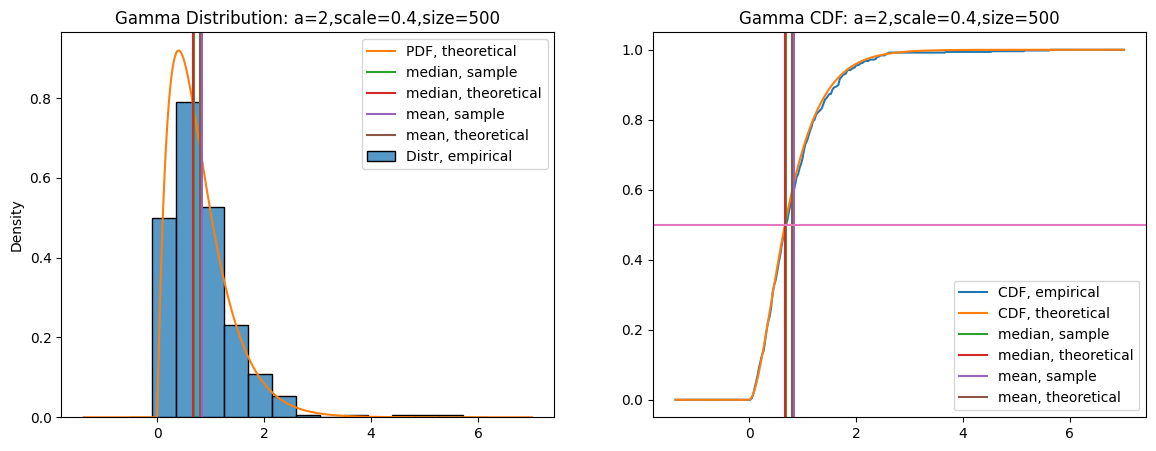

(0.8349781690956838, 0.8, 0.6493152125591648, 0.5656854249492381)

<Figure size 640x480 with 0 Axes>

In [305]:
from scipy.stats import gamma 

a = 2
scale = 0.4

results = simulate_distribution(sample_size=500, scipy_object = erlang, a=a, scale=scale, name='Gamma')

results[0].mean(), a*scale, results[0].std(ddof=1), np.sqrt(a*scale**2)

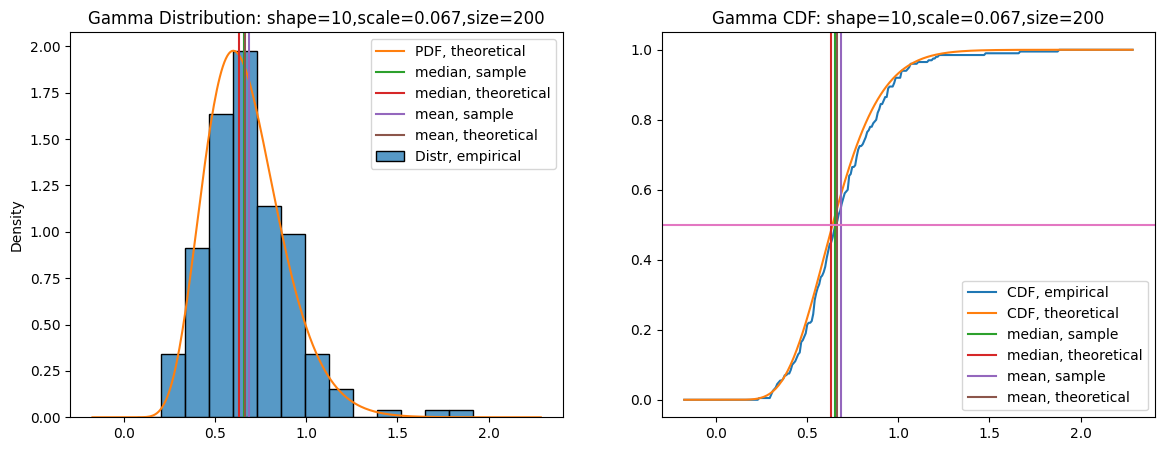

<Figure size 640x480 with 0 Axes>

In [303]:
from numpy.random import gamma

shape = 10
scale = 1/15

pdf_gamma = lambda x: ((1/scale)**shape / Gamma(shape)) * x**(shape-1) * exp(-x/scale) if x>0 else 0

results = simulate_distribution_numpy(
    sample_size = 200,
    np_rng = gamma,
    shape = shape,
    scale = scale,
    pdf_lambda = pdf_gamma,
    name = 'Gamma',
)

---
# 12. Student's t
$$ T \sim t_\nu  \, \text{ for } \, \nu >0 \, \text{ the degrees of freedom}$$

For $T$ a random variable with Student's t distribution with $\nu$ degrees of freedom, we can write
$$ \begin{equation}
T \equiv \frac{Z}{\sqrt{V/\nu}} = Z \, \sqrt{\frac \nu V}
\end{equation}$$
with the following random variables:
- $Z \sim \mathcal N(0,1)$ a standard Normal random variable
- $V \sim \chi^2(\nu)$ a $\chi^2$ random variable with $\nu$ degrees of freedom
- $Z \perp V$ independent

An approximation of the Normal distribution, based on uncertainty in estimation of population variance based on sample variance.

As degrees of freedom $\nu$ approaches $\infty$, the distribution approaches the Normal distribution.

## 12.1. Parameters
- $\nu$ (`df`): degrees of freedom. $\nu>0$, typically $\nu\in\mathbb N$

## 12.2. PDF

$$ \begin{equation}
f(x, \nu) = \frac{ \Gamma((\nu+1)/2) }{ \sqrt{\pi\nu} \, \Gamma(\nu/2) } \, \left( 1 + \frac{x^2}\nu \right) ^{-(\nu+1)/2} 
= \frac{ 1 }{ \sqrt{\nu} \, \text{B}\left( \frac12,\, \frac\nu2 \right) } \, \left( 1 + \frac{x^2}\nu \right) ^{-(\nu+1)/2} 
\, 
\propto \, \left( 1 + \frac{x^2}\nu \right) ^{-(\nu+1)/2} 
\end{equation}$$

## 12.3. Statistics
$$ \begin{equation} \begin{aligned}
\mathrm E[X] &= 0 \\
\mathrm{Var}[X] &= \left\{
    \begin{matrix}
    \frac{\nu}{\nu+2} & \nu>2 \\
    \infty & 1 < \nu \le 2 \\
    \text{undefined} & \text{otherwise}
    \end{matrix} \right.
\end{aligned} \end{equation}
$$

## 12.4. Proofs and Motivation

### 12.4.1. Motivation



Say we are sampling variables $X_1, \ldots X_n$, with $X_i \sim \mathcal N(\mu, \sigma)$ i.i.d.  We have 
- $\overline{X}_n := \frac 1n (X_1 + \cdots X_n)$ the sample mean
- $s^2 := \frac 1{n-1} \sum_{i=1}^n \left(X_i - \overline{X}_n \right)^2$ the unbiased estimate of the population variance $\sigma^2$

We note that the following variable 
$$ V := (n-1) \, \frac{s^2}{\sigma^2} $$
has distribution $ V \sim \chi^2(n-1)$, from Cochran's theorem.  For degrees of freedom, we note that intuitively, the collection of $(X_i - \overline{X}_n)$ terms has rank $(n-1)$ since they must sum to 0.

The statistic 
$$ Z := \left( \overline{X}_n - \mu \right) \, \frac{\sqrt n}{\sigma} \sim \mathcal N(0,1)$$
follows the standard normal distribution.  However, in statistical hypothesis testing, we usually do not have access to $\sigma$ (and we usually make assumptions on the $\mu$ value in the hypotheses).  Instead, we can only estimate $\sigma^2$ with $s^2$.  So we instead have the statistic, which follows the Student's-t distribution
$$ T := \left( \overline{X}_n - \mu \right) \, \frac{\sqrt n}{s} = Z \cdot \sqrt\frac \sigma s = \frac{Z}{\sqrt{V/\nu}}$$
where $\nu=(n-1)$ is the degrees of freedom.  We note that this statistic only depends on $\nu$ and not $\mu,\sigma^2$.

### 12.4.2. Derivation of PDF

We note that for $ T \sim t_\nu$:
$$ T \equiv \frac{Z}{\sqrt{V/\nu}} $$
We compute the CDF of $T$, and then take the derivative:

$$ \begin{align}
F_\nu(t) &= P(T < t) = P \left(Z < t \cdot \sqrt{V/\nu} \right) \\
    &= \int_0^\infty \left( \int_0^{t\sqrt{x/\nu}}\frac1{\sqrt{2\pi}} e^{-z^2/2} \, dz \right) 
        \cdot \frac{x^{\nu/2 - 1} \, e^{-x/2}}{2^{\nu/2} \, \Gamma(\nu/2)} \, dx  \\
    &= 2^{-(\nu-1)/2} \, \frac1{\Gamma(1/2)\, \Gamma(\nu/2)} \cdot \int_0^\infty \int_0^{tu/\sqrt\nu} e^{-(z^2+u^2)/2} \, u^{\nu-1} \, dz \, du 
        & (x=u^2, \, dx = 2u\,du) \\
    &= 2^{-(\nu-1)/2} \, \frac1{\Gamma(1/2)\, \Gamma(\nu/2)} \int_0^\infty \int_0^{\arctan(t\sqrt\nu)} 
        e^{-r^2/2} \, (r\cos\theta)^{\nu-1} \, r \, d\theta \, dr 
        & (u = r\cos\theta, \, z = r\sin\theta) \\
    &= 2^{-(\nu-1)/2} \, \frac1{\Gamma(1/2)\, \Gamma(\nu/2)} \int_0^\infty r^\nu \, e^{-r^2/2} \, dr 
        \cdot \int_0^{\arctan(t/\sqrt\nu)} \cos^{\nu-1}\theta  \, d\theta \\
    &= 2^{-(\nu-1)/2} \, \frac1{\Gamma(1/2)\, \Gamma(\nu/2)} \int_0^\infty \left( s^{(\nu-1)/2} \, e^{-s/2} \cdot \frac12 \, ds \right)
        \cdot \int_0^{\arctan(t/\sqrt\nu)} \cos^{\nu-1}\theta  \, d\theta 
        & (s = r^2, \, ds = 2r \, dr ) \\
    &= 2^{-(\nu-1)/2} \, \frac1{\Gamma(1/2)\, \Gamma(\nu/2)} \cdot \left( \Gamma((\nu+1)/2) \cdot 2^{(\nu-1)/2} \right) 
        \cdot \int_0^{\arctan(t/\sqrt\nu)} \cos^{\nu-1}\theta  \, d\theta 
        & \text{ Gamma distribution PDF} \\
    &= \frac1{\text{B}(1/2, \, \nu/2)} \, \int_0^{\arctan(t/\sqrt\nu)} \cos^{\nu-1}\theta  \, d\theta \\
f_\nu(t) &= \frac{d}{dt} F_\nu(t) \\
    &= \frac1{\text{B}(1/2, \, \nu/2)} \cdot \frac{d}{dt} \int_0^{\arctan(t/\sqrt\nu)} \cos^{\nu-1}\theta  \, d\theta \\
    &= \frac1{\text{B}(1/2, \, \nu/2)} \cdot  \left( \cos^{\nu-1} \left( \arctan(t/\sqrt\nu) \right) \cdot \frac1{1+t^2/\nu} \cdot \frac1{\sqrt\nu} \right)
        & \text{derivative of integral and chain rule} \\
    &= \frac1{\sqrt\nu \, \text{B}(1/2, \, \nu/2)} \cdot \left( 1 + \frac{t^2}{\nu} \right) ^{-(\nu+1)/2}
\end{align} $$

### 12.4.3. Verify that PDF integrates to 1

We will verify that the PDF integrates to 1:
$$ \begin{align} 
f(x, \nu) &= \frac{1}{\sqrt\nu \, \text{B}(1/2, \nu/2)} \cdot \left(1 + \frac{x^2}{\nu} \right)^{-\frac{\nu+1}2} \\
\int_{-\infty}^\infty f(x, \nu) \, dx 
    &= \frac{1}{\sqrt\nu \, \text{B}(1/2, \nu/2)} \, \int_{-\infty}^\infty \left(1 + \frac{x^2}{\nu} \right)^{-\frac{\nu+1}2} \, dx \\
    &= \frac{1}{\sqrt\nu \, \text{B}(1/2, \nu/2)} \, 
        \int_{-\pi/2}^{\pi/2} (1 + \tan^2\theta)^{-(\nu+1)/2} \cdot \sqrt{\nu} \, \sec^2\theta \, d\theta 
        & (x = \sqrt \nu \, \tan\theta, \, dx = \sqrt{\nu} \sec^2\theta \, d\theta) \\
    &= \frac{1}{\sqrt\nu \, \text{B}(1/2, \nu/2)} \,  
        \int_{-\pi/2}^{\pi/2} \sec^{-(\nu-1)}\theta  \cdot \sqrt{\nu} \, d\theta 
        & (1 + \tan^2\theta = \sec^2\theta) \\
    &= \frac{1}{\sqrt\nu \, \text{B}(1/2, \nu/2)} \cdot 2 \, \int_0^{\pi/2} \sqrt{\nu} \cos^{v-1}\theta \, d\theta \\
    &= \frac{1}{\sqrt\nu \, \text{B}(1/2, \nu/2)} \cdot 
        2 \sqrt\nu \cdot \frac12 \cdot \text{B}(1/2, \nu/2) 
        & \text{Wallis Integrals.  See 10.4.5.3} \\
    &= 1
\end{align} $$

### 12.4.4. Verify Mean = 0

We note that the distribution is only defined for $\mu>0$.  

We also note that the PDF is symmetric across $x=0$, therefore $\mathrm E[X] = 0$.

(We also note that for $\nu=1$, we get the pathological Cauchy distribution, for which the expected value is not defined)

### 12.4.5. Verify Variance
$$ \begin{align} 
\mathrm{Var}[X] &= \left\{
    \begin{matrix}
    \frac{\nu}{\nu+2} & \nu>2 \\
    \infty & 1 < \nu \le 2 \\
    \text{undefined} & \text{otherwise}
    \end{matrix} \right.
\end{align}$$

Since the mean is equal to zero, the variance is equal to the 2nd moment: $\mathrm{Var}[X] = \mathrm E[X^2]$.

$$\begin{align}
\mathrm E[X^2] &= \frac{1}{\sqrt\nu \, \text B(1/2,\, \nu/2)} \, 
    \int_{-\infty}^\infty x^2 \, \left(1+\frac{x^2}\nu \right)^{-(\nu+1)/2} \, dx  \\
    &= \frac{1}{\sqrt\nu \, \text B(1/2,\, \nu/2)} \, 
        \int_{-\pi/2}^{\pi/2} \nu \, \tan^2 \theta \, \sec^{-(\nu-1)} \theta \, \sqrt\nu \, d\theta 
        & (x = \sqrt\nu \, \tan\theta , \, dx = \sqrt\nu \, \sec^2\theta) \\
    &= \frac{\nu}{\text B(1/2,\, \nu/2)} \, 
        \left( \int_{-\pi/2}^{\pi/2} \cos^{\nu-3} \theta \, d\theta - \int_{-\pi/2}^{\pi/2} \cos^{\nu-1}\theta \, d\theta \right) 
        & (\tan = \sin/\cos,\, \sin^2 = 1-\cos^2, \, \sec = 1/\cos) \\
    &= \frac{\nu}{\text B(1/2,\, \nu/2)} \,  
        \left( \text B(1/2, \, \nu/2-1) -  \text B(1/2, \, \nu/2)  \right) 
        & \text{Wallis Integrals, if } \nu >= 3 \\
    &= \nu \left( \frac{(\nu-1)/2}{(\nu-2)/2} - 1 \right) \\
    &= \frac \nu{\nu-2}
\end{align}$$

We will now look at the remaining positive integer cases for $\nu$.

For $\nu=2$, we note that the integral, 
$$ \int_{-\pi/2}^{\pi/2} \cos^{\nu-3} \theta \, d\theta = \int_{-\pi/2}^{\pi/2} \frac1{\cos \theta} \, d\theta = \infty$$ 
which is a component in our expression.

For $\nu=1$, we note that the distribution becomes the pathological Cauchy distribution.


## 12.5. Simulation

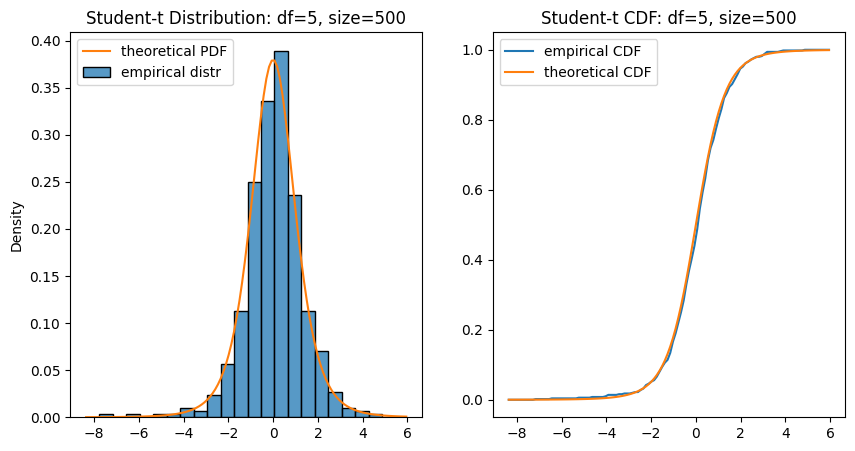

(0.03533383839506699, 0.8, 1.3203331148319555, 0.5656854249492381)

<Figure size 640x480 with 0 Axes>

In [1861]:
from scipy.stats import t

df = 5

results = simulate_distribution(sample_size=500, scipy_object = t, df=df, name='Student-t')

results[0].mean(), a*scale, results[0].std(ddof=1), np.sqrt(a*scale**2)

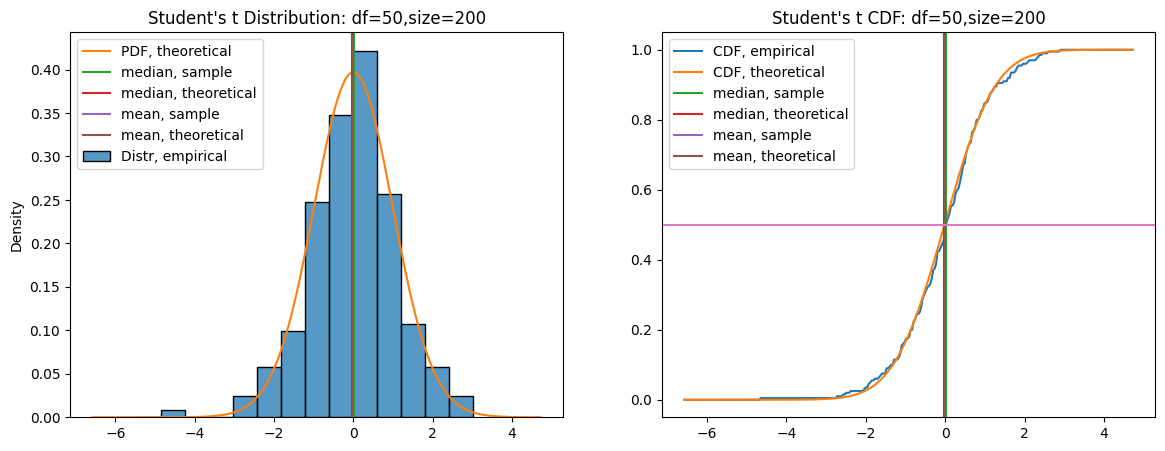

<Figure size 640x480 with 0 Axes>

In [307]:
from numpy.random import standard_t

df = 50
pdf_t = lambda x: (1 + x**2 / df)**(-(df+1)/2) / (df**0.5 * Beta(0.5, df/2))

results = simulate_distribution_numpy(
    sample_size = 200,
    np_rng = standard_t,
    df = df,
    pdf_lambda = pdf_t,
    name = 'Student\'s t',
)
    

# 13. Summary

Through our journey, we've noticed a general family of distributions, and their corresponding PDF/PMFs:
- Normal:
$$ f(x) \, \propto \, e^{-x^2} $$
- Binomial: (Bernoulli / Binomial / Multinomial)
- Beta: (Beta, Uniform)
$$ f(x,a,b) \, \propto \, x^{a-1}(1-x)^{b-1} $$
- Poisson
$$ P(k,\lambda) \, \propto \, \frac{\lambda^k}{k!} $$
- Gamma: (Exponential, Erlang, Gamma, Chi-2)
$$ f(x, \alpha, \lambda) \, \propto \, x^{\alpha-1} e^{-\lambda x} $$
- Student's t:
$$ f(x, \nu) \, \propto \, \left( 1 + \frac{x^2}\nu \right) ^{-(\nu+1)/2}  $$

# 14. Credits

Some inspiration for the proofs detailed in this notebook come from Wikipedia.  :)